<a href="https://colab.research.google.com/github/Alexgit999/AED_UE/blob/main/AED_actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CARGAMOS LIBRERÍAS E IMPORTAMOS DATASET DESDE MI GOOGLE DRIVE




He seleccionado el siguiente dataset de kaggle:
https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

Éste dataset de dominio público trata de la relación entre varios factores que se creen relacionados con el rendimiento académico en una asignatura en particular.

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
import scipy.stats as stats
%matplotlib inline

#drive.mount('/content/drive')

In [ ]:
file_id = "16ofJPVb5ftmlc8QFv1wBYtYBmBF7NIYk"
url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(url)

# SACAMOS UNA MUESTRA DE LA BASE DE DATOS

In [ ]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


# **A continuación pondré la descripción general que facilitan en kaggle sobre cada variable:**

***Hours_Studied***:	Number of hours spent studying per week.

***Attendance***:	Percentage of classes attended.

***Parental_Involvement***:	Level of parental involvement in the student's education (Low, Medium, High).

***Access_to_Resources***: Availability of educational resources (Low, Medium, High).

***Extracurricular_Activities***:	Participation in extracurricular activities (Yes, No).

***Sleep_Hours***: Average number of hours of sleep per night.

***Previous_Scores***: Scores from previous exams.

***Motivation_Level***: Student's level of motivation (Low, Medium, High).

***Internet_Access***: Availability of internet access (Yes, No).

***Tutoring_Sessions***:	Number of tutoring sessions attended per month.

***Family_Income***:	Family income level (Low, Medium, High).

***Teacher_Quality***:	Quality of the teachers (Low, Medium, High).

***School_Type***:	Type of school attended (Public, Private).

***Peer_Influence***:	Influence of peers on academic performance (Positive, Neutral, Negative).

***Physical_Activity***:	Average number of hours of physical activity per week.

***Learning_Disabilities***:	Presence of learning disabilities (Yes, No).

***Parental_Education_Level***:	Highest education level of parents (High School, College, Postgraduate).

***Distance_from_Home***:	Distance from home to school (Near, Moderate, Far).

***Gender***:	Gender of the student (Male, Female).
Exam_Score	Final exam score.

# **2. Análisis descriptivo de variables cuantitativas**

# a. Selección de al menos 5 variables cuantitativas.

VARIABLES CUANTITATIVAS:
- Hours_Studied
- Attendance
- Sleep_Hours
- Previous_Scores
- Tutoring_Sessions
- Physical_Activity
- Exam_Score

In [ ]:
variables_cuantitativas = df.select_dtypes(include=['number']).columns # Aquí coincide que todas las variables numéricas son cuantitativas
print("Variables cuantitativas:", variables_cuantitativas)

Variables cuantitativas: Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


# b. Cálculo y descripción de las medidas de tendencia central: media, mediana y moda.

In [ ]:
tendencia_central = {}

for var in variables_cuantitativas:
    media = round(df[var].mean(), 2) # Redondeo a 2 decimales
    mediana = df[var].median()
    moda = df[var].mode()[0]
    tendencia_central[var] = {'Media': media, 'Mediana': mediana, 'Moda': moda}

# Convertir el diccionario en un DataFrame para una mejor visualización
medidas_df = pd.DataFrame(tendencia_central).transpose()
print(medidas_df)

                   Media  Mediana  Moda
Hours_Studied      19.98     20.0  20.0
Attendance         79.98     80.0  67.0
Sleep_Hours         7.03      7.0   7.0
Previous_Scores    75.07     75.0  66.0
Tutoring_Sessions   1.49      1.0   1.0
Physical_Activity   2.97      3.0   3.0
Exam_Score         67.24     67.0  68.0


# c. Cálculo y descripción de las medidas de dispersión: rango, varianza, desviación estándar, percentiles.

In [ ]:
medidas_dispersión = {}

for var in variables_cuantitativas:
    # Calcular las medidas de dispersión
    rango = df[var].max() - df[var].min()  # Rango
    varianza = round(df[var].var(), 2)  # Varianza
    desviacion_estandar = round(df[var].std(), 2)  # Desviación estándar
    percentiles = {f'{p}°': np.percentile(df[var], p) for p in [25, 50, 75]}  # Percentiles 25, 50, 75

    medidas_dispersión[var] = {
        'Rango': rango,
        'Varianza': varianza,
        'Desviación Estándar': desviacion_estandar,
        'Percentiles': percentiles
    }

# Convertir a DataFrame para visualizar mejor
medidas_disp_df = pd.DataFrame(medidas_dispersión).transpose()

# Mostrar los resultados
print(medidas_disp_df)

                  Rango Varianza Desviación Estándar  \
Hours_Studied        43    35.89                5.99   
Attendance           40   133.34               11.55   
Sleep_Hours           6     2.16                1.47   
Previous_Scores      50   207.35                14.4   
Tutoring_Sessions     8     1.51                1.23   
Physical_Activity     6     1.06                1.03   
Exam_Score           46    15.14                3.89   

                                               Percentiles  
Hours_Studied      {'25°': 16.0, '50°': 20.0, '75°': 24.0}  
Attendance         {'25°': 70.0, '50°': 80.0, '75°': 90.0}  
Sleep_Hours           {'25°': 6.0, '50°': 7.0, '75°': 8.0}  
Previous_Scores    {'25°': 63.0, '50°': 75.0, '75°': 88.0}  
Tutoring_Sessions     {'25°': 1.0, '50°': 1.0, '75°': 2.0}  
Physical_Activity     {'25°': 2.0, '50°': 3.0, '75°': 4.0}  
Exam_Score         {'25°': 65.0, '50°': 67.0, '75°': 69.0}  


# d. Visualización de los datos: histogramas, boxplots y gráficos de densidad.

<Axes: xlabel='Hours_Studied', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Hours_Studied')

<Axes: xlabel='Hours_Studied'>

Text(0.5, 1.0, 'Boxplot de Hours_Studied')

<Axes: xlabel='Hours_Studied', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Hours_Studied')

<Axes: xlabel='Attendance', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Attendance')

<Axes: xlabel='Attendance'>

Text(0.5, 1.0, 'Boxplot de Attendance')

<Axes: xlabel='Attendance', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Attendance')

<Axes: xlabel='Sleep_Hours', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Sleep_Hours')

<Axes: xlabel='Sleep_Hours'>

Text(0.5, 1.0, 'Boxplot de Sleep_Hours')

<Axes: xlabel='Sleep_Hours', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Sleep_Hours')

<Axes: xlabel='Previous_Scores', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Previous_Scores')

<Axes: xlabel='Previous_Scores'>

Text(0.5, 1.0, 'Boxplot de Previous_Scores')

<Axes: xlabel='Previous_Scores', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Previous_Scores')

<Axes: xlabel='Tutoring_Sessions', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Tutoring_Sessions')

<Axes: xlabel='Tutoring_Sessions'>

Text(0.5, 1.0, 'Boxplot de Tutoring_Sessions')

<Axes: xlabel='Tutoring_Sessions', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Tutoring_Sessions')

<Axes: xlabel='Physical_Activity', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Physical_Activity')

<Axes: xlabel='Physical_Activity'>

Text(0.5, 1.0, 'Boxplot de Physical_Activity')

<Axes: xlabel='Physical_Activity', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Physical_Activity')

<Axes: xlabel='Exam_Score', ylabel='Count'>

Text(0.5, 1.0, 'Histograma de Exam_Score')

<Axes: xlabel='Exam_Score'>

Text(0.5, 1.0, 'Boxplot de Exam_Score')

<Axes: xlabel='Exam_Score', ylabel='Density'>

Text(0.5, 1.0, 'Densidad de Exam_Score')

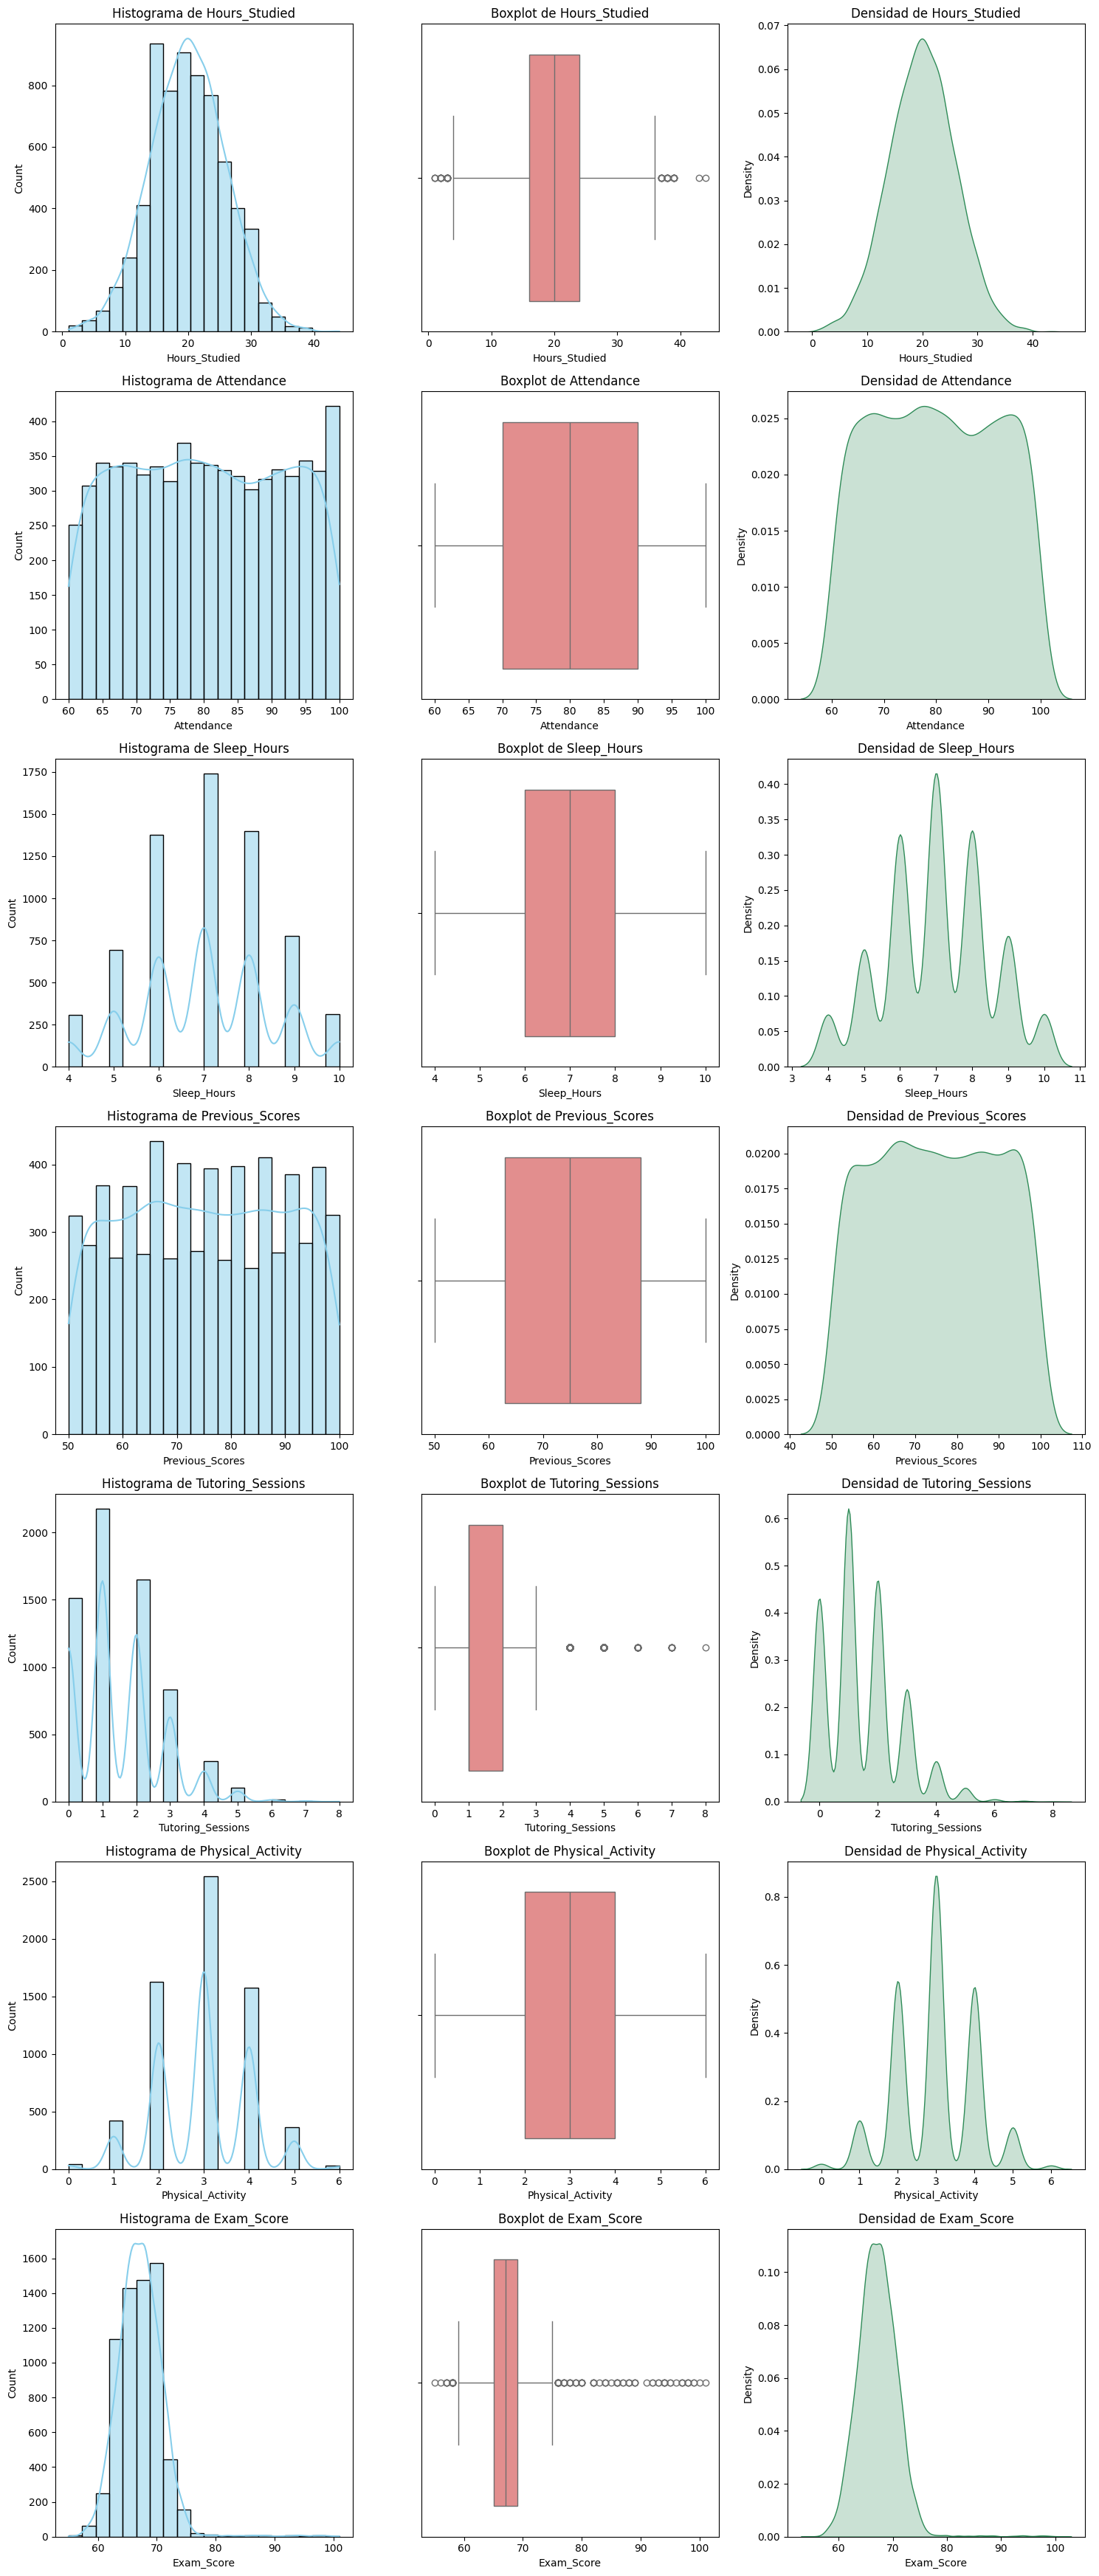

In [ ]:
#sns.set_style("whitegrid")

# Crear subplots para cada tipo de gráfico
fig, axes = plt.subplots(nrows=len(variables_cuantitativas), ncols=3, figsize=(15, 5 * len(variables_cuantitativas)))

for i, var in enumerate(variables_cuantitativas):
    # Histograma fila 1
    sns.histplot(df[var], bins=20, kde=True, ax=axes[i, 0], color="skyblue")
    axes[i, 0].set_title(f"Histograma de {var}")

    # Boxplot fila 2
    sns.boxplot(x=df[var], ax=axes[i, 1], color="lightcoral")
    axes[i, 1].set_title(f"Boxplot de {var}")

    # Gráfico de Densidad fila 3
    sns.kdeplot(df[var], fill=True, ax=axes[i, 2], color="seagreen")
    axes[i, 2].set_title(f"Densidad de {var}")

# Ajustar el espacio entre gráficos
plt.tight_layout()
plt.show()

# e. Verificación de la condición de normalidad mediante la prueba de Shapiro-Wilk y la prueba de Kolmogorov-Smirnov.

In [ ]:
# import scipy.stats as stats

normalidad = {}

for var in variables_cuantitativas:
    # Prueba de Shapiro-Wilk: evalúa si una muestra de datos proviene de una distribución normal
    shapiro_stat, shapiro_p = stats.shapiro(df[var].dropna())
    # shapiro_test = stats.shapiro(df[var]) # Otra forma


    # Prueba de Kolmogorov-Smirnov: compara la distribución de una muestra de datos con una distribución teórica
    ks_stat, ks_p = stats.kstest(df[var].dropna(), 'norm', args=(df[var].mean(), df[var].std())) # Comparamos con la distribucion normal

    # Guardar resultados
    normalidad[var] = {
        "Shapiro-Wilk p-valor": round(shapiro_p, 4),
        "Kolmogorov-Smirnov p-valor": round(ks_p, 4),
        "Normalidad (p > 0.05)": shapiro_p > 0.05 and ks_p > 0.05 # Conclusión final para cada variable
    }

# Diccionario a DataFrame
resultados_df = pd.DataFrame(normalidad).transpose()

print(resultados_df)
print("\nAunque algunos de los gráficos tienen la apariencia de campana de Gauss,\nrealmente ninguna variable sigue una distribución normal, ya que las\npruebas correspondientes así lo indican\n")

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6607.
  res = hypotest_fun_out(*samples, **kwds)


                  Shapiro-Wilk p-valor Kolmogorov-Smirnov p-valor  \
Hours_Studied                      0.0                        0.0   
Attendance                         0.0                        0.0   
Sleep_Hours                        0.0                        0.0   
Previous_Scores                    0.0                        0.0   
Tutoring_Sessions                  0.0                        0.0   
Physical_Activity                  0.0                        0.0   
Exam_Score                         0.0                        0.0   

                  Normalidad (p > 0.05)  
Hours_Studied                     False  
Attendance                        False  
Sleep_Hours                       False  
Previous_Scores                   False  
Tutoring_Sessions                 False  
Physical_Activity                 False  
Exam_Score                        False  

Aunque algunos de los gráficos tienen la apariencia de campana de Gauss,
realmente ninguna variable sigue una 

# f. Interpretación de los resultados obtenidos.

1. En primer lugar, comentar que algunas de éstas variables cuantitativas son discretas (Sleep_Hours, Tutoring_Sessions y Physical_Activity), el resto aunque son números enteros, podemos entenderlas como variables continuas.

2. Comparando Previous_Scores, Attendance y otras variables que no se acumulan a lo largo de un valor, podemos determinar que el resultado del examen (Exam_Score) se ajusta bastante bien a la dificultad del mismo, y no tanto a éstos factores, ya que si así fuera, la nota final habría sido más dispersa en lugar de concentrarse sobre el 65 - 70.

3. Para determinar qué variables determinan la nota, es mucho más útil estudiar las variables que sí se agrupan en densidad en torno a un valor concreto.

4. Otra forma más sencilla de determinar qué factores determinan las notas altas (si éste fuera el objetivo), sería seleccionando las notas más altas y rehacer las visualizaciones, así podremos también determinar dónde se concentran los valores de horas de estudio, asistencia a clases, etc.

5. Aunque algunos de los gráficos tienen la apariencia de campana de Gauss, realmente ninguna variable sigue una distribución normal, ya que las pruebas correspondientes así lo indican.

# **3. Análisis descriptivo de variables categóricas**

# a. Selección de al menos 3 variables categóricas.

Como en el punto 4 me piden las variables binarias, las excluiré de éste apartado

In [ ]:
#all_categorical_vars = df.select_dtypes(include=['object', 'category']).columns
categorical_vars = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() > 2] # sin las binarias

print("Variables categóricas:", categorical_vars, "\n")

for col in categorical_vars:
    print(f"{col}: {df[col].unique()}")



Variables categóricas: ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Family_Income', 'Teacher_Quality', 'Peer_Influence', 'Parental_Education_Level', 'Distance_from_Home'] 

Parental_Involvement: ['Low' 'Medium' 'High']
Access_to_Resources: ['High' 'Medium' 'Low']
Motivation_Level: ['Low' 'Medium' 'High']
Family_Income: ['Low' 'Medium' 'High']
Teacher_Quality: ['Medium' 'High' 'Low' nan]
Peer_Influence: ['Positive' 'Negative' 'Neutral']
Parental_Education_Level: ['High School' 'College' 'Postgraduate' nan]
Distance_from_Home: ['Near' 'Moderate' 'Far' nan]


# b. Cálculo de frecuencias absolutas y relativas.

In [ ]:
for col in categorical_vars:
    print(f"Frecuencia absoluta de {col}:")
    print(df[col].value_counts())

    print(f"\nFrecuencia relativa de {col}:")
    print(df[col].value_counts(normalize=True))
    print("\n" + "="*50)

Frecuencia absoluta de Parental_Involvement:
Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64

Frecuencia relativa de Parental_Involvement:
Parental_Involvement
Medium    0.508854
High      0.288785
Low       0.202361
Name: proportion, dtype: float64

Frecuencia absoluta de Access_to_Resources:
Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64

Frecuencia relativa de Access_to_Resources:
Access_to_Resources
Medium    0.502346
High      0.298925
Low       0.198729
Name: proportion, dtype: float64

Frecuencia absoluta de Motivation_Level:
Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64

Frecuencia relativa de Motivation_Level:
Motivation_Level
Medium    0.507189
Low       0.293174
High      0.199637
Name: proportion, dtype: float64

Frecuencia absoluta de Family_Income:
Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64

Frecuencia 

# c. Visualización de los datos: gráficos de barras, diagramas de tarta y gráficos de mosaico.



<Axes: title={'center': 'Frecuencia de Parental_Involvement'}, xlabel='Parental_Involvement'>

Text(0.5, 0, 'Parental_Involvement')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Parental_Involvement'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Access_to_Resources'}, xlabel='Access_to_Resources'>

Text(0.5, 0, 'Access_to_Resources')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Access_to_Resources'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Motivation_Level'}, xlabel='Motivation_Level'>

Text(0.5, 0, 'Motivation_Level')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Motivation_Level'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Family_Income'}, xlabel='Family_Income'>

Text(0.5, 0, 'Family_Income')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Family_Income'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Teacher_Quality'}, xlabel='Teacher_Quality'>

Text(0.5, 0, 'Teacher_Quality')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Teacher_Quality'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Peer_Influence'}, xlabel='Peer_Influence'>

Text(0.5, 0, 'Peer_Influence')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Peer_Influence'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Parental_Education_Level'}, xlabel='Parental_Education_Level'>

Text(0.5, 0, 'Parental_Education_Level')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Parental_Education_Level'}, ylabel='proportion'>

<Axes: title={'center': 'Frecuencia de Distance_from_Home'}, xlabel='Distance_from_Home'>

Text(0.5, 0, 'Distance_from_Home')

Text(0, 0.5, 'Frecuencia')

<Axes: title={'center': 'Proporción de Distance_from_Home'}, ylabel='proportion'>

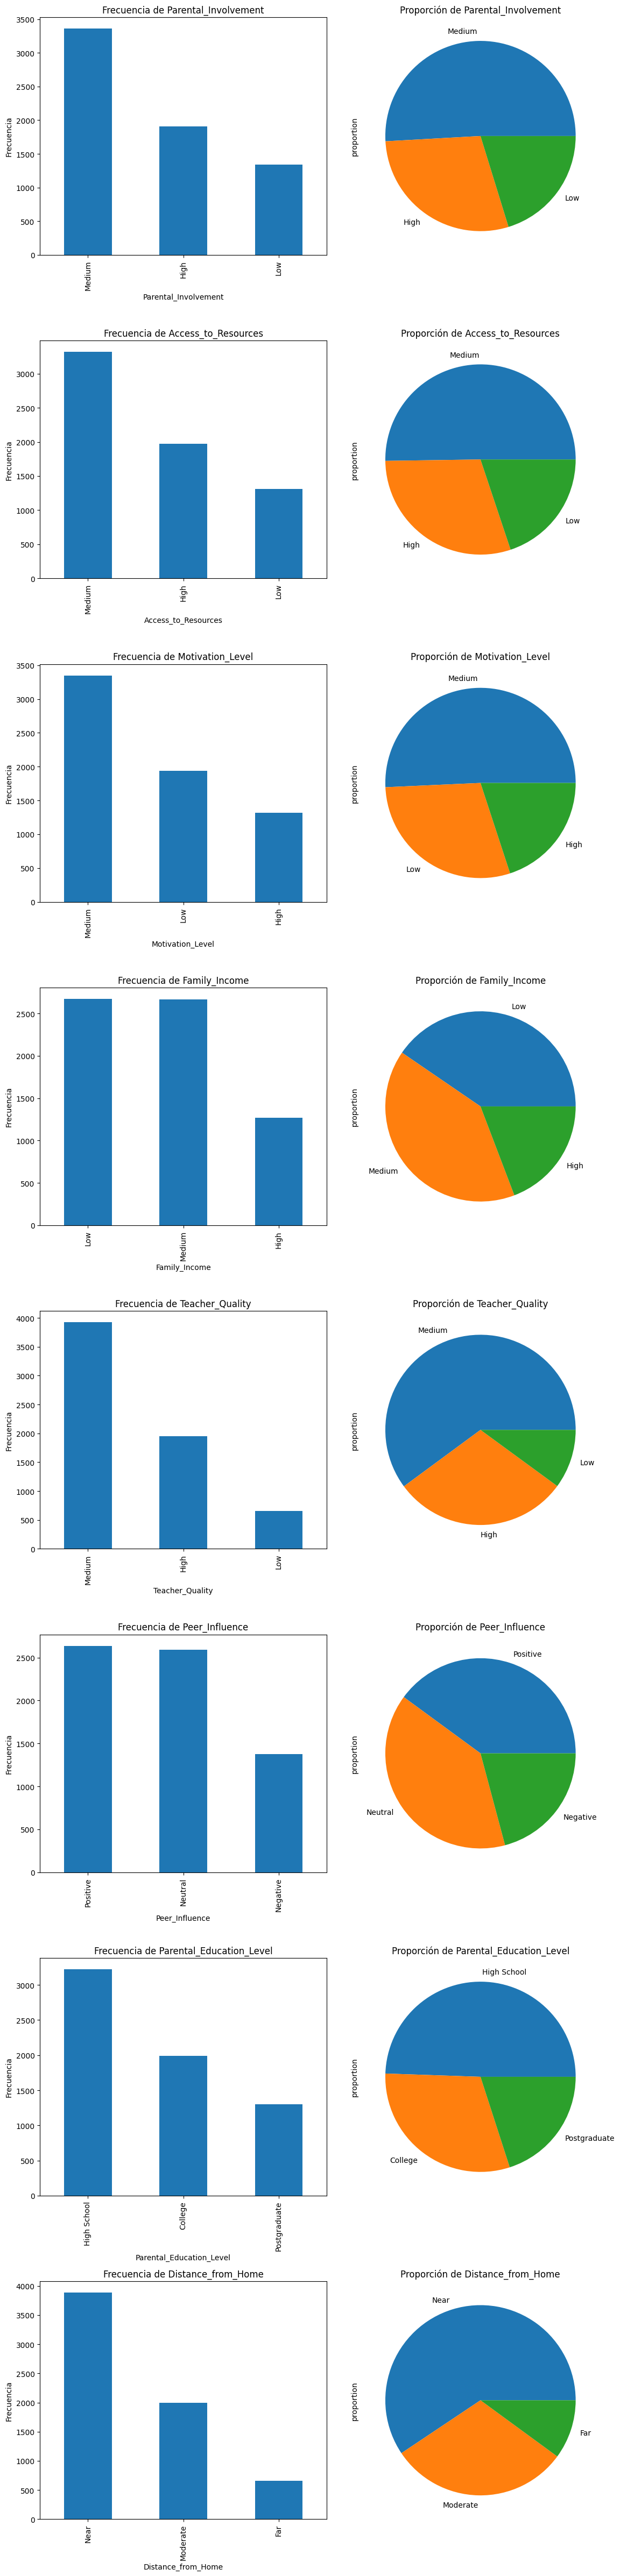

In [ ]:


# Crear subgráficos: dos columnas para cada gráfico
fig, axes = plt.subplots(nrows=len(categorical_vars), ncols=2, figsize=(12, 6 * len(categorical_vars)))

# Iterar sobre las variables categóricas y graficar
for i, col in enumerate(categorical_vars):
    # Gráfico de barras (frecuencia absoluta)
    df[col].value_counts().plot(kind='bar', ax=axes[i, 0], title=f'Frecuencia de {col}')
    axes[i, 0].set_xlabel(col)
    axes[i, 0].set_ylabel('Frecuencia')

    # Gráfico de tarta (frecuencia relativa)
    df[col].value_counts(normalize=True).plot(kind='pie', ax=axes[i, 1], title=f'Proporción de {col}')

# Ajustar espacio entre subgráficos
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'High'): (0.0,
   np.float64(0.0),
   0.20035755656691748,
   np.float64(0.30759781461906904)),
  ('Low', 'Medium'): (0.0,
   np.float64(0.31090907289721476),
   0.20035755656691748,
   np.float64(0.5141490041458835)),
  ('Low', 'Low'): (0.0,
   np.float64(0.828369335321244),
   0.20035755656691748,
   np.float64(0.17163066467875593)),
  ('Medium', 'High'): (0.20530805161642243,
   np.float64(0.0),
   0.5038160846506929,
   np.float64(0.2934038789588348)),
  ('Medium', 'Medium'): (0.20530805161642243,
   np.float64(0.2967151372369805),
   0.5038160846506929,
   np.float64(0.5023027132225771)),
  ('Medium', 'Low'): (0.20530805161642243,
   np.float64(0.8023291087377034),
   0.5038160846506929,
   np.float64(0.19767089126229653)),
  ('High', 'High'): (0.7140746313166204,
   np.float64(0.0),
   0.2859253686833796,
   np.float64(0.2957224374193011)),
  ('High', 'Medium'): (0.7140746313166204,
   np.float64(0.2990336956974468),
   0.285925368683

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Access_to_Resources')

<Figure size 800x600 with 0 Axes>

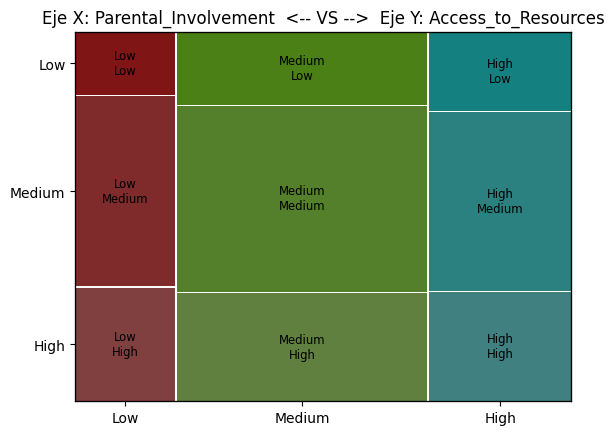

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Low'): (0.0,
   np.float64(0.0),
   0.20035755656691748,
   np.float64(0.27342027966139465)),
  ('Low', 'Medium'): (0.0,
   np.float64(0.27673153793954036),
   0.20035755656691748,
   np.float64(0.5134060142554993)),
  ('Low', 'High'): (0.0,
   np.float64(0.7934488104731854),
   0.20035755656691748,
   np.float64(0.2065511895268145)),
  ('Medium', 'Low'): (0.20530805161642243,
   np.float64(0.0),
   0.5038160846506929,
   np.float64(0.29399482332733196)),
  ('Medium', 'Medium'): (0.20530805161642243,
   np.float64(0.29730608160547767),
   0.5038160846506929,
   np.float64(0.49787063045884855)),
  ('Medium', 'High'): (0.20530805161642243,
   np.float64(0.7984879703424719),
   0.5038160846506929,
   np.float64(0.20151202965752796)),
  ('High', 'Low'): (0.7140746313166204,
   np.float64(0.0),
   0.2859253686833796,
   np.float64(0.2988462659835895)),
  ('High', 'Medium'): (0.7140746313166204,
   np.float64(0.3021575242617352),
   0.2859253686

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Motivation_Level')

<Figure size 800x600 with 0 Axes>

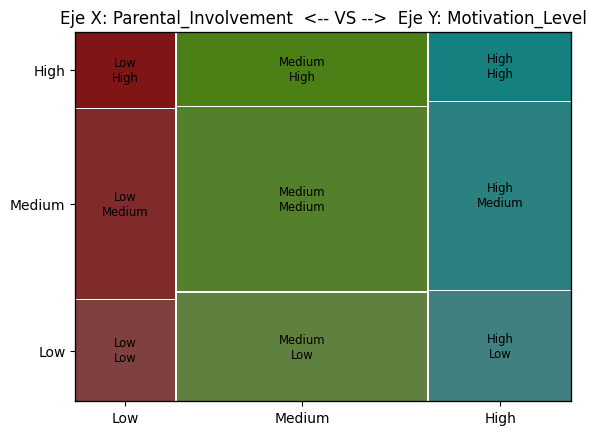

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Low'): (0.0,
   np.float64(0.0),
   0.20035755656691748,
   np.float64(0.42424722740939236)),
  ('Low', 'Medium'): (0.0,
   np.float64(0.42755848568753807),
   0.20035755656691748,
   np.float64(0.3826397935478757)),
  ('Low', 'High'): (0.0,
   np.float64(0.8135095375135595),
   0.20035755656691748,
   np.float64(0.1864904624864404)),
  ('Medium', 'Low'): (0.20530805161642243,
   np.float64(0.0),
   0.5038160846506929,
   np.float64(0.3938644216033502)),
  ('Medium', 'Medium'): (0.20530805161642243,
   np.float64(0.39717567988149594),
   0.5038160846506929,
   np.float64(0.4077516142630332)),
  ('Medium', 'High'): (0.20530805161642243,
   np.float64(0.8082385524226748),
   0.5038160846506929,
   np.float64(0.19176144757732502)),
  ('High', 'Low'): (0.7140746313166204,
   np.float64(0.0),
   0.2859253686833796,
   np.float64(0.3998500562289141)),
  ('High', 'Medium'): (0.7140746313166204,
   np.float64(0.40316131450705983),
   0.28592536868

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Family_Income')

<Figure size 800x600 with 0 Axes>

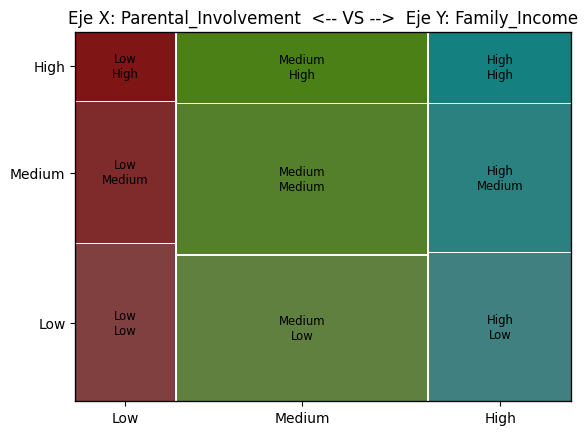

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Medium'): (0.0,
   np.float64(0.0),
   0.20032482647866565,
   np.float64(0.5918153516049951)),
  ('Low', 'High'): (0.0,
   np.float64(0.5951266098831407),
   0.20032482647866565,
   np.float64(0.2917717362423611)),
  ('Low', 'Low'): (0.0,
   np.float64(0.8902096044036476),
   0.20032482647866565,
   np.float64(0.10979039559635229)),
  ('Medium', 'Medium'): (0.2052753215281706,
   np.float64(0.0),
   0.5039208163426236,
   np.float64(0.5954883981401947)),
  ('Medium', 'High'): (0.2052753215281706,
   np.float64(0.5987996564183404),
   0.5039208163426236,
   np.float64(0.2974452591111917)),
  ('Medium', 'Low'): (0.2052753215281706,
   np.float64(0.8995561738076778),
   0.5039208163426236,
   np.float64(0.10044382619232203)),
  ('High', 'Medium'): (0.7141466329202992,
   np.float64(0.0),
   0.28585336707970077,
   np.float64(0.603931350677183)),
  ('High', 'High'): (0.7141466329202992,
   np.float64(0.6072426089553287),
   0.2858533670797007

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Teacher_Quality')

<Figure size 800x600 with 0 Axes>

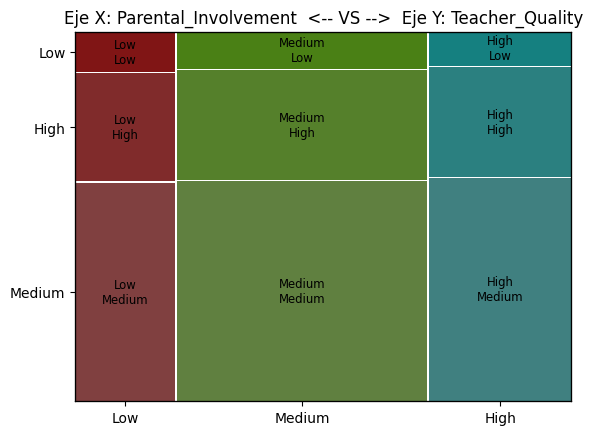

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Positive'): (0.0,
   np.float64(0.0),
   0.20035755656691748,
   np.float64(0.3878407227805653)),
  ('Low', 'Negative'): (0.0,
   np.float64(0.391151981058711),
   0.20035755656691748,
   np.float64(0.2258689266768043)),
  ('Low', 'Neutral'): (0.0,
   np.float64(0.620332166013661),
   0.20035755656691748,
   np.float64(0.37966783398633885)),
  ('Medium', 'Positive'): (0.20530805161642243,
   np.float64(0.0),
   0.5038160846506929,
   np.float64(0.3926825328663559)),
  ('Medium', 'Negative'): (0.20530805161642243,
   np.float64(0.3959937911445016),
   0.5038160846506929,
   np.float64(0.20298939057877094)),
  ('Medium', 'Neutral'): (0.20530805161642243,
   np.float64(0.6022944400014183),
   0.5038160846506929,
   np.float64(0.39770555999858165)),
  ('High', 'Positive'): (0.7140746313166204,
   np.float64(0.0),
   0.2859253686833796,
   np.float64(0.40974218001582735)),
  ('High', 'Negative'): (0.7140746313166204,
   np.float64(0.41305343829

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Peer_Influence')

<Figure size 800x600 with 0 Axes>

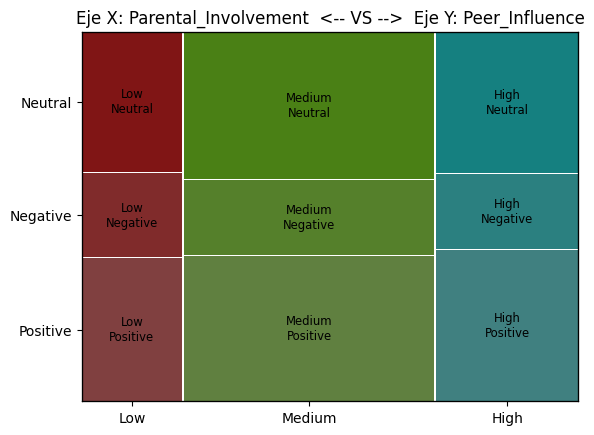

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'High School'): (0.0,
   np.float64(0.0),
   0.2000859898787178,
   np.float64(0.4782090542925673)),
  ('Low', 'College'): (0.0,
   np.float64(0.48152031257071304),
   0.2000859898787178,
   np.float64(0.31226900390713386)),
  ('Low', 'Postgraduate'): (0.0,
   np.float64(0.7971005747559926),
   0.2000859898787178,
   np.float64(0.20289942524400725)),
  ('Medium', 'High School'): (0.20503648492822277,
   np.float64(0.0),
   0.503785225844972,
   np.float64(0.4984861678076993)),
  ('Medium', 'College'): (0.20503648492822277,
   np.float64(0.501797426085845),
   0.503785225844972,
   np.float64(0.2938791650356689)),
  ('Medium', 'Postgraduate'): (0.20503648492822277,
   np.float64(0.7989878493996596),
   0.503785225844972,
   np.float64(0.20101215060034028)),
  ('High', 'High School'): (0.7137722058226997,
   np.float64(0.0),
   0.2862277941773002,
   np.float64(0.48772514447209675)),
  ('High', 'College'): (0.7137722058226997,
   np.float64(0

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Parental_Education_Level')

<Figure size 800x600 with 0 Axes>

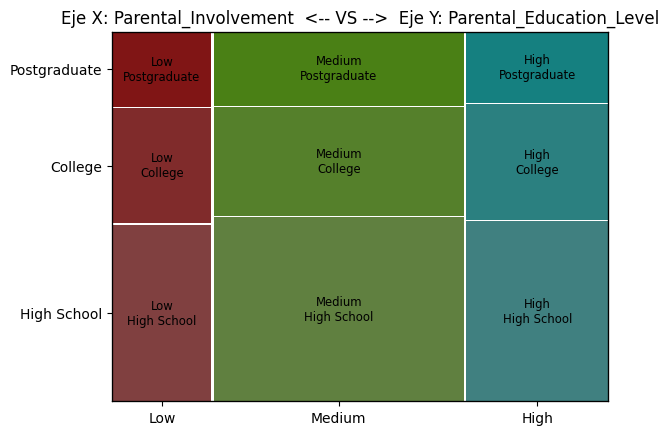

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Near'): (0.0,
   np.float64(0.0),
   0.20044206255487934,
   np.float64(0.5822212440727476)),
  ('Low', 'Moderate'): (0.0,
   np.float64(0.5855325023508933),
   0.20044206255487934,
   np.float64(0.30686660931153836)),
  ('Low', 'Far'): (0.0,
   np.float64(0.8957103699405773),
   0.20044206255487934,
   np.float64(0.10428963005942254)),
  ('Medium', 'Near'): (0.2053925576043843,
   np.float64(0.0),
   0.5047385472492204,
   np.float64(0.5941195866786907)),
  ('Medium', 'Moderate'): (0.2053925576043843,
   np.float64(0.5974308449568364),
   0.5047385472492204,
   np.float64(0.2982516079565543)),
  ('Medium', 'Far'): (0.2053925576043843,
   np.float64(0.8989937111915365),
   0.5047385472492204,
   np.float64(0.10100628880846343)),
  ('High', 'Near'): (0.7150815999031096,
   np.float64(0.0),
   0.2849184000968904,
   np.float64(0.5880034625697615)),
  ('High', 'Moderate'): (0.7150815999031096,
   np.float64(0.5913147208479071),
   0.284918400

Text(0.5, 1.0, 'Eje X: Parental_Involvement  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

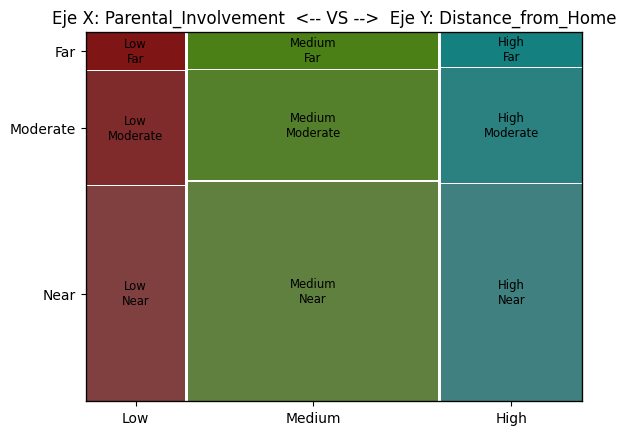

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High', 'Low'): (0.0,
   np.float64(0.0),
   0.29596572492121315,
   np.float64(0.2846843825970324)),
  ('High', 'Medium'): (0.0,
   np.float64(0.2879956408751781),
   0.29596572492121315,
   np.float64(0.5165562913907285)),
  ('High', 'High'): (0.0,
   np.float64(0.8078631905440522),
   0.29596572492121315,
   np.float64(0.19213680945594772)),
  ('Medium', 'Low'): (0.3009162199707181,
   np.float64(0.0),
   0.4973722739308894,
   np.float64(0.2885254275503872)),
  ('Medium', 'Medium'): (0.3009162199707181,
   np.float64(0.2918366858285329),
   0.4973722739308894,
   np.float64(0.503722297268985)),
  ('Medium', 'High'): (0.3009162199707181,
   np.float64(0.7988702413756636),
   0.4973722739308894,
   np.float64(0.20112975862433627)),
  ('Low', 'Low'): (0.8032389889511125,
   np.float64(0.0),
   0.19676101104888752,
   np.float64(0.3079243227430231)),
  ('Low', 'Medium'): (0.8032389889511125,
   np.float64(0.31123558102116883),
   0.196761011048887

Text(0.5, 1.0, 'Eje X: Access_to_Resources  <-- VS -->  Eje Y: Motivation_Level')

<Figure size 800x600 with 0 Axes>

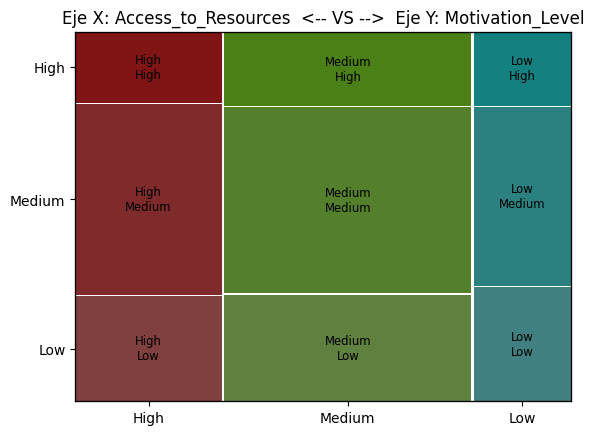

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High', 'Low'): (0.0,
   np.float64(0.0),
   0.29596572492121315,
   np.float64(0.41797300695783374)),
  ('High', 'Medium'): (0.0,
   np.float64(0.4212842652359795),
   0.29596572492121315,
   np.float64(0.3837706429709112)),
  ('High', 'High'): (0.0,
   np.float64(0.8083661664850365),
   0.29596572492121315,
   np.float64(0.1916338335149635)),
  ('Medium', 'Low'): (0.3009162199707181,
   np.float64(0.0),
   0.4973722739308894,
   np.float64(0.3914847087509402)),
  ('Medium', 'Medium'): (0.3009162199707181,
   np.float64(0.3947959670290859),
   0.4973722739308894,
   np.float64(0.40734762126149054)),
  ('Medium', 'High'): (0.3009162199707181,
   np.float64(0.8054548465687222),
   0.4973722739308894,
   np.float64(0.19454515343127768)),
  ('Low', 'Low'): (0.8032389889511125,
   np.float64(0.0),
   0.19676101104888752,
   np.float64(0.40325224575437674)),
  ('Low', 'Medium'): (0.8032389889511125,
   np.float64(0.40656350403252245),
   0.196761011048

Text(0.5, 1.0, 'Eje X: Access_to_Resources  <-- VS -->  Eje Y: Family_Income')

<Figure size 800x600 with 0 Axes>

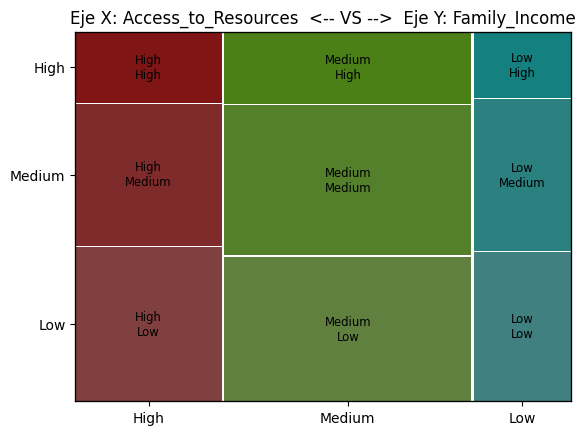

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High', 'Medium'): (0.0,
   np.float64(0.0),
   0.2955587333890381,
   np.float64(0.591745129952871)),
  ('High', 'High'): (0.0,
   np.float64(0.5950563882310166),
   0.2955587333890381,
   np.float64(0.29612740784032565)),
  ('High', 'Low'): (0.0,
   np.float64(0.8944950543494881),
   0.2955587333890381,
   np.float64(0.10550494565051183)),
  ('Medium', 'Medium'): (0.30050922843854305,
   np.float64(0.0),
   0.49740002335353767,
   np.float64(0.607535131642707)),
  ('Medium', 'High'): (0.30050922843854305,
   np.float64(0.6108463899208527),
   0.49740002335353767,
   np.float64(0.29013891132288805)),
  ('Medium', 'Low'): (0.30050922843854305,
   np.float64(0.9042965595218866),
   0.49740002335353767,
   np.float64(0.09570344047811336)),
  ('Low', 'Medium'): (0.8028597468415857,
   np.float64(0.0),
   0.1971402531584143,
   np.float64(0.5792154865002546)),
  ('Low', 'High'): (0.8028597468415857,
   np.float64(0.5825267447784003),
   0.197140253158

Text(0.5, 1.0, 'Eje X: Access_to_Resources  <-- VS -->  Eje Y: Teacher_Quality')

<Figure size 800x600 with 0 Axes>

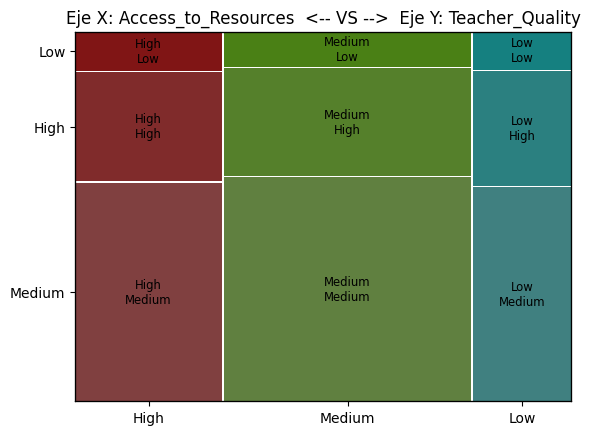

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High', 'Positive'): (0.0,
   np.float64(0.0),
   0.29596572492121315,
   np.float64(0.3968480174364992)),
  ('High', 'Negative'): (0.0,
   np.float64(0.40015927571464494),
   0.29596572492121315,
   np.float64(0.2147707268002347)),
  ('High', 'Neutral'): (0.0,
   np.float64(0.6182412607930253),
   0.29596572492121315,
   np.float64(0.3817587392069745)),
  ('Medium', 'Positive'): (0.3009162199707181,
   np.float64(0.0),
   0.4973722739308894,
   np.float64(0.3995658151242395)),
  ('Medium', 'Negative'): (0.3009162199707181,
   np.float64(0.4028770734023852),
   0.4973722739308894,
   np.float64(0.20232695956852878)),
  ('Medium', 'Neutral'): (0.3009162199707181,
   np.float64(0.6085152912490597),
   0.4973722739308894,
   np.float64(0.3914847087509402)),
  ('Low', 'Positive'): (0.8032389889511125,
   np.float64(0.0),
   0.19676101104888752,
   np.float64(0.3888774002209186)),
  ('Low', 'Negative'): (0.8032389889511125,
   np.float64(0.392188658499

Text(0.5, 1.0, 'Eje X: Access_to_Resources  <-- VS -->  Eje Y: Peer_Influence')

<Figure size 800x600 with 0 Axes>

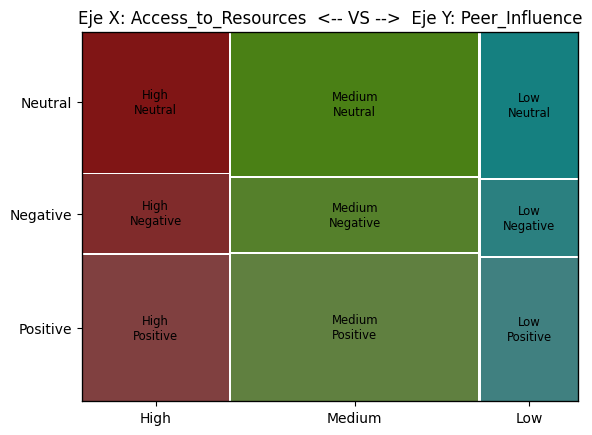

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High', 'High School'): (0.0,
   np.float64(0.0),
   0.2959510313468051,
   np.float64(0.5012782680827338)),
  ('High', 'College'): (0.0,
   np.float64(0.5045895263608794),
   0.2959510313468051,
   np.float64(0.2957694765900159)),
  ('High', 'Postgraduate'): (0.0,
   np.float64(0.8036702612290411),
   0.2959510313468051,
   np.float64(0.19632973877095877)),
  ('Medium', 'High School'): (0.30090152639631007,
   np.float64(0.0),
   0.4967966491293904,
   np.float64(0.4814994835652226)),
  ('Medium', 'College'): (0.30090152639631007,
   np.float64(0.4848107418433683),
   0.4967966491293904,
   np.float64(0.3122911477003462)),
  ('Medium', 'Postgraduate'): (0.30090152639631007,
   np.float64(0.8004131478218602),
   0.4967966491293904,
   np.float64(0.19958685217813962)),
  ('Low', 'High School'): (0.8026486705752055,
   np.float64(0.0),
   0.19735132942479455,
   np.float64(0.5008947279873972)),
  ('Low', 'College'): (0.8026486705752055,
   np.float6

Text(0.5, 1.0, 'Eje X: Access_to_Resources  <-- VS -->  Eje Y: Parental_Education_Level')

<Figure size 800x600 with 0 Axes>

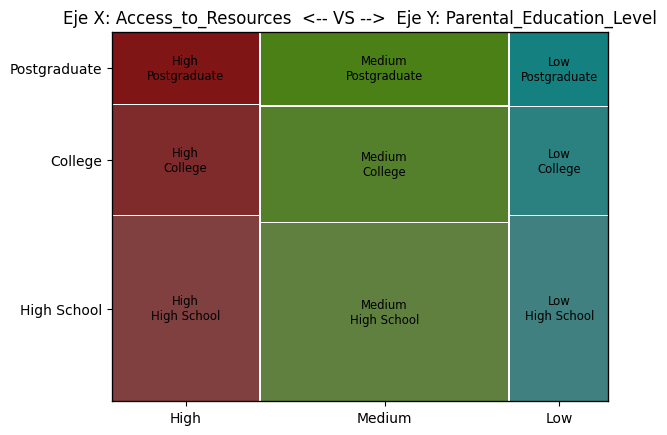

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High', 'Near'): (0.0,
   np.float64(0.0),
   0.29521300753928603,
   np.float64(0.5838003056546103)),
  ('High', 'Moderate'): (0.0,
   np.float64(0.5871115639327559),
   0.29521300753928603,
   np.float64(0.3051451859398879)),
  ('High', 'Far'): (0.0,
   np.float64(0.8955680081507895),
   0.29521300753928603,
   np.float64(0.10443199184921034)),
  ('Medium', 'Near'): (0.300163502588791,
   np.float64(0.0),
   0.49807733066884674,
   np.float64(0.5963284285110407)),
  ('Medium', 'Moderate'): (0.300163502588791,
   np.float64(0.5996396867891864),
   0.49807733066884674,
   np.float64(0.30435395237424256)),
  ('Medium', 'Far'): (0.300163502588791,
   np.float64(0.9073048974415748),
   0.49807733066884674,
   np.float64(0.09269510255842509)),
  ('Low', 'Near'): (0.8031913283071427,
   np.float64(0.0),
   0.19680867169285735,
   np.float64(0.5830361691288842)),
  ('Low', 'Moderate'): (0.8031913283071427,
   np.float64(0.5863474274070299),
   0.1968086

Text(0.5, 1.0, 'Eje X: Access_to_Resources  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

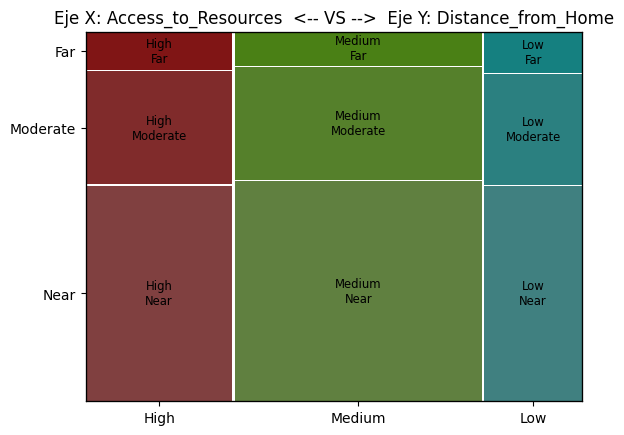

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Low'): (0.0,
   np.float64(0.0),
   0.29027119451766575,
   np.float64(0.41181317460263184)),
  ('Low', 'Medium'): (0.0,
   np.float64(0.41512443288077755),
   0.29027119451766575,
   np.float64(0.3897609124508098)),
  ('Low', 'High'): (0.0,
   np.float64(0.808196603609733),
   0.29027119451766575,
   np.float64(0.19180339639026686)),
  ('Medium', 'Low'): (0.2952216895671707,
   np.float64(0.0),
   0.5021676679549293,
   np.float64(0.4028648164726947)),
  ('Medium', 'Medium'): (0.2952216895671707,
   np.float64(0.4061760747508404),
   0.5021676679549293,
   np.float64(0.3993075112499777)),
  ('Medium', 'High'): (0.2952216895671707,
   np.float64(0.8087948442789639),
   0.5021676679549293,
   np.float64(0.19120515572103608)),
  ('High', 'Low'): (0.8023398525716049,
   np.float64(0.0),
   0.19766014742839508,
   np.float64(0.38409591854154)),
  ('High', 'Medium'): (0.8023398525716049,
   np.float64(0.38740717681968573),
   0.1976601474283950

Text(0.5, 1.0, 'Eje X: Motivation_Level  <-- VS -->  Eje Y: Family_Income')

<Figure size 800x600 with 0 Axes>

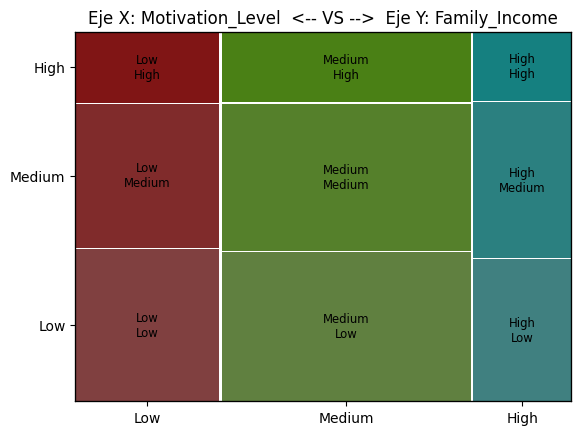

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Medium'): (0.0,
   np.float64(0.0),
   0.28979617214286907,
   np.float64(0.6097497582833439)),
  ('Low', 'High'): (0.0,
   np.float64(0.6130610165614895),
   0.28979617214286907,
   np.float64(0.3025356856955721)),
  ('Low', 'Low'): (0.0,
   np.float64(0.9189079605352074),
   0.28979617214286907,
   np.float64(0.0810920394647925)),
  ('Medium', 'Medium'): (0.294746667192374,
   np.float64(0.0),
   0.5022527065082063,
   np.float64(0.5953666378731164)),
  ('Medium', 'High'): (0.294746667192374,
   np.float64(0.598677896151262),
   0.5022527065082063,
   np.float64(0.2879355024474517)),
  ('Medium', 'Low'): (0.294746667192374,
   np.float64(0.8899246568768595),
   0.5022527065082063,
   np.float64(0.11007534312314039)),
  ('High', 'Medium'): (0.8019498687500853,
   np.float64(0.0),
   0.19805013124991466,
   np.float64(0.5834000993884566)),
  ('High', 'High'): (0.8019498687500853,
   np.float64(0.5867113576666023),
   0.19805013124991466,
 

Text(0.5, 1.0, 'Eje X: Motivation_Level  <-- VS -->  Eje Y: Teacher_Quality')

<Figure size 800x600 with 0 Axes>

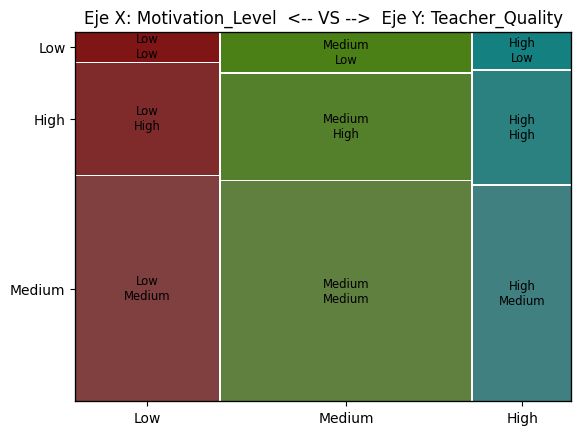

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Positive'): (0.0,
   np.float64(0.0),
   0.29027119451766575,
   np.float64(0.4015563084855053)),
  ('Low', 'Negative'): (0.0,
   np.float64(0.404867566763651),
   0.29027119451766575,
   np.float64(0.213855658542089)),
  ('Low', 'Neutral'): (0.0,
   np.float64(0.6220344835838857),
   0.29027119451766575,
   np.float64(0.3779655164161142)),
  ('Medium', 'Positive'): (0.2952216895671707,
   np.float64(0.0),
   0.5021676679549293,
   np.float64(0.3918964587026507)),
  ('Medium', 'Negative'): (0.2952216895671707,
   np.float64(0.39520771698079643),
   0.5021676679549293,
   np.float64(0.19980197667593536)),
  ('Medium', 'Neutral'): (0.2952216895671707,
   np.float64(0.5983209519348776),
   0.5021676679549293,
   np.float64(0.4016790480651224)),
  ('High', 'Positive'): (0.8023398525716049,
   np.float64(0.0),
   0.19766014742839508,
   np.float64(0.40141789133851147)),
  ('High', 'Negative'): (0.8023398525716049,
   np.float64(0.40472914961665

Text(0.5, 1.0, 'Eje X: Motivation_Level  <-- VS -->  Eje Y: Peer_Influence')

<Figure size 800x600 with 0 Axes>

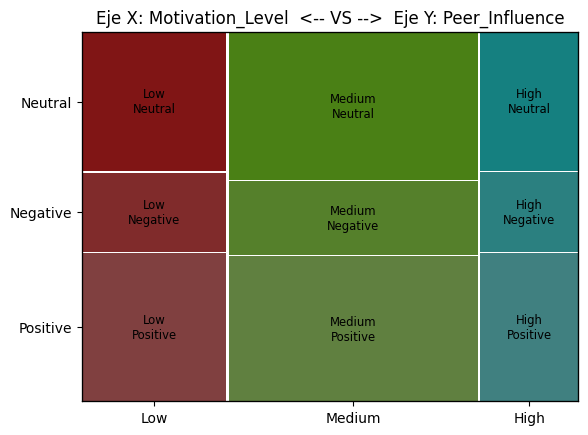

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'High School'): (0.0,
   np.float64(0.0),
   0.2892663057927705,
   np.float64(0.48886276364850567)),
  ('Low', 'College'): (0.0,
   np.float64(0.4921740219266514),
   0.2892663057927705,
   np.float64(0.303126217374367)),
  ('Low', 'Postgraduate'): (0.0,
   np.float64(0.798611497579164),
   0.2892663057927705,
   np.float64(0.2013885024208358)),
  ('Medium', 'High School'): (0.29421680084227547,
   np.float64(0.0),
   0.5033294491026514,
   np.float64(0.49414008231670137)),
  ('Medium', 'College'): (0.29421680084227547,
   np.float64(0.4974513405948471),
   0.5033294491026514,
   np.float64(0.29654401784661266)),
  ('Medium', 'Postgraduate'): (0.29421680084227547,
   np.float64(0.7973066167196055),
   0.5033294491026514,
   np.float64(0.20269338328039443)),
  ('High', 'High School'): (0.8024967449944319,
   np.float64(0.0),
   0.19750325500556812,
   np.float64(0.4875191034131431)),
  ('High', 'College'): (0.8024967449944319,
   np.float64

Text(0.5, 1.0, 'Eje X: Motivation_Level  <-- VS -->  Eje Y: Parental_Education_Level')

<Figure size 800x600 with 0 Axes>

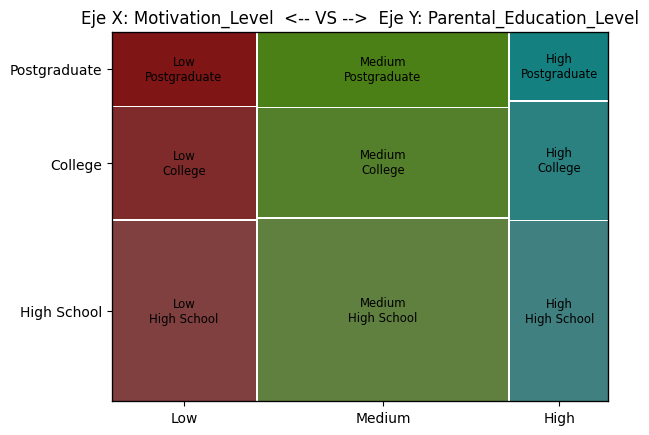

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Near'): (0.0,
   np.float64(0.0),
   0.29082266024767617,
   np.float64(0.5817541222666174)),
  ('Low', 'Moderate'): (0.0,
   np.float64(0.585065380544763),
   0.29082266024767617,
   np.float64(0.3159571277376918)),
  ('Low', 'Far'): (0.0,
   np.float64(0.9043337665606006),
   0.29082266024767617,
   np.float64(0.09566623343939931)),
  ('Medium', 'Near'): (0.2957731552971811,
   np.float64(0.0),
   0.5011051563871984,
   np.float64(0.5960264900662251)),
  ('Medium', 'Moderate'): (0.2957731552971811,
   np.float64(0.5993377483443707),
   0.5011051563871984,
   np.float64(0.2980132450331126)),
  ('Medium', 'Far'): (0.2957731552971811,
   np.float64(0.9006622516556291),
   0.5011051563871984,
   np.float64(0.09933774834437083)),
  ('High', 'Near'): (0.8018288067338845,
   np.float64(0.0),
   0.19817119326611554,
   np.float64(0.5866163443101502)),
  ('High', 'Moderate'): (0.8018288067338845,
   np.float64(0.5899276025882959),
   0.1981711932

Text(0.5, 1.0, 'Eje X: Motivation_Level  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

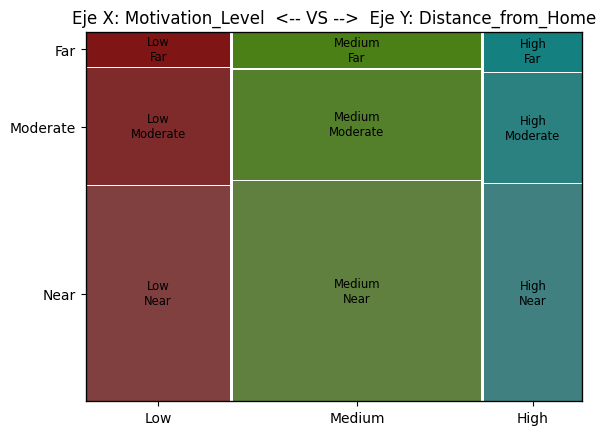

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Medium'): (0.0,
   np.float64(0.0),
   0.4004980066087479,
   np.float64(0.5856451123520842)),
  ('Low', 'High'): (0.0,
   np.float64(0.5889563706302298),
   0.4004980066087479,
   np.float64(0.3012856358343092)),
  ('Low', 'Low'): (0.0,
   np.float64(0.8935532647426847),
   0.4004980066087479,
   np.float64(0.10644673525731517)),
  ('Medium', 'Medium'): (0.40544850165825286,
   np.float64(0.0),
   0.39928483582008073,
   np.float64(0.6059112185380159)),
  ('Medium', 'High'): (0.40544850165825286,
   np.float64(0.6092224768161615),
   0.39928483582008073,
   np.float64(0.29616457444106004)),
  ('Medium', 'Low'): (0.40544850165825286,
   np.float64(0.9086983095353673),
   0.39928483582008073,
   np.float64(0.09130169046463259)),
  ('High', 'Medium'): (0.8096838325278385,
   np.float64(0.0),
   0.19031616747216148,
   np.float64(0.603150312656658)),
  ('High', 'High'): (0.8096838325278385,
   np.float64(0.6064615709348037),
   0.190316167472

Text(0.5, 1.0, 'Eje X: Family_Income  <-- VS -->  Eje Y: Teacher_Quality')

<Figure size 800x600 with 0 Axes>

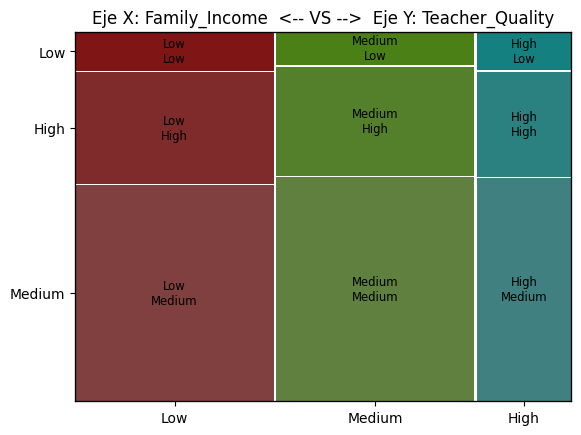

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Positive'): (0.0,
   np.float64(0.0),
   0.40041540100733247,
   np.float64(0.39296407185628734)),
  ('Low', 'Negative'): (0.0,
   np.float64(0.39627533013443306),
   0.40041540100733247,
   np.float64(0.21451302692627988)),
  ('Low', 'Neutral'): (0.0,
   np.float64(0.6140996153388587),
   0.40041540100733247,
   np.float64(0.3859003846611412)),
  ('Medium', 'Positive'): (0.4053658960568374,
   np.float64(0.0),
   0.399516264627825,
   np.float64(0.3934758524068102)),
  ('Medium', 'Negative'): (0.4053658960568374,
   np.float64(0.3967871106849559),
   0.399516264627825,
   np.float64(0.20456273008649511)),
  ('Medium', 'Neutral'): (0.4053658960568374,
   np.float64(0.6046610990495968),
   0.399516264627825,
   np.float64(0.39533890095040314)),
  ('High', 'Positive'): (0.8098326557341674,
   np.float64(0.0),
   0.19016734426583262,
   np.float64(0.41097177211028124)),
  ('High', 'Negative'): (0.8098326557341674,
   np.float64(0.414283030388

Text(0.5, 1.0, 'Eje X: Family_Income  <-- VS -->  Eje Y: Peer_Influence')

<Figure size 800x600 with 0 Axes>

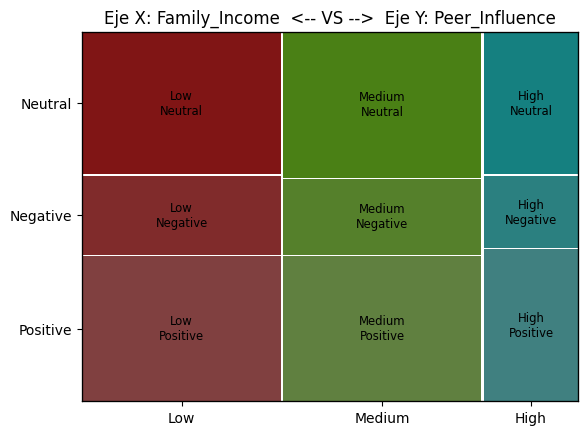

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'High School'): (0.0,
   np.float64(0.0),
   0.4000200541766621,
   np.float64(0.4923500250262209)),
  ('Low', 'College'): (0.0,
   np.float64(0.4956612833043666),
   0.4000200541766621,
   np.float64(0.3037101686943355)),
  ('Low', 'Postgraduate'): (0.0,
   np.float64(0.8026827102768478),
   0.4000200541766621,
   np.float64(0.19731728972315207)),
  ('Medium', 'High School'): (0.40497054922616704,
   np.float64(0.0),
   0.39941235185356805,
   np.float64(0.48554205638081605)),
  ('Medium', 'College'): (0.40497054922616704,
   np.float64(0.48885331465896176),
   0.39941235185356805,
   np.float64(0.30757294466457924)),
  ('Medium', 'Postgraduate'): (0.40497054922616704,
   np.float64(0.7997375176016867),
   0.39941235185356805,
   np.float64(0.20026248239831318)),
  ('High', 'High School'): (0.80933339612924,
   np.float64(0.0),
   0.19066660387075995,
   np.float64(0.5010421888604522)),
  ('High', 'College'): (0.80933339612924,
   np.float

Text(0.5, 1.0, 'Eje X: Family_Income  <-- VS -->  Eje Y: Parental_Education_Level')

<Figure size 800x600 with 0 Axes>

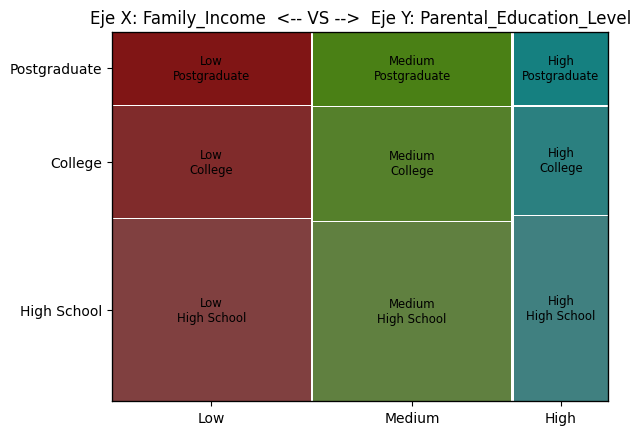

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Low', 'Near'): (0.0,
   np.float64(0.0),
   0.4011869076815938,
   np.float64(0.5821566912407846)),
  ('Low', 'Moderate'): (0.0,
   np.float64(0.5854679495189303),
   0.4011869076815938,
   np.float64(0.31075846557540915)),
  ('Low', 'Far'): (0.0,
   np.float64(0.8995376733724852),
   0.4011869076815938,
   np.float64(0.10046232662751467)),
  ('Medium', 'Near'): (0.4061374027310988,
   np.float64(0.0),
   0.398613255820995,
   np.float64(0.5983656242847405)),
  ('Medium', 'Moderate'): (0.4061374027310988,
   np.float64(0.6016768825628861),
   0.398613255820995,
   np.float64(0.29088265846376726)),
  ('Medium', 'Far'): (0.4061374027310988,
   np.float64(0.8958707993047992),
   0.398613255820995,
   np.float64(0.10412920069520074)),
  ('High', 'Near'): (0.8097011536015988,
   np.float64(0.0),
   0.19029884639840128,
   np.float64(0.588755946830201)),
  ('High', 'Moderate'): (0.8097011536015988,
   np.float64(0.5920672051083468),
   0.19029884639840

Text(0.5, 1.0, 'Eje X: Family_Income  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

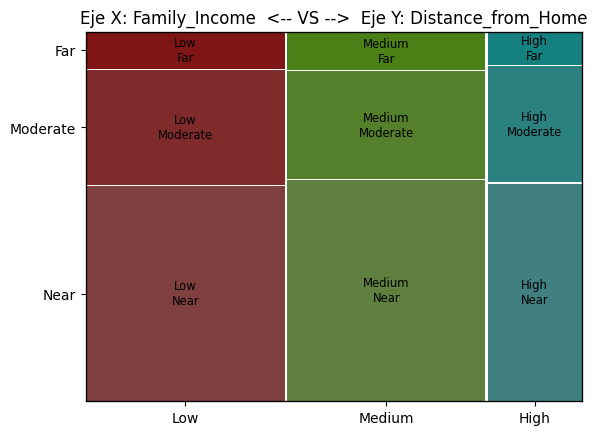

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Medium', 'Positive'): (0.0,
   np.float64(0.0),
   0.5952119181898279,
   np.float64(0.3991226220103766)),
  ('Medium', 'Negative'): (0.0,
   np.float64(0.40243388028852234),
   0.5952119181898279,
   np.float64(0.21158307672839247)),
  ('Medium', 'Neutral'): (0.0,
   np.float64(0.6173282152950605),
   0.5952119181898279,
   np.float64(0.38267178470493934)),
  ('High', 'Positive'): (0.6001624132393328,
   np.float64(0.0),
   0.2952554406918712,
   np.float64(0.3903101052051551)),
  ('High', 'Negative'): (0.6001624132393328,
   np.float64(0.3936213634833008),
   0.2952554406918712,
   np.float64(0.2056143430035)),
  ('High', 'Neutral'): (0.6001624132393328,
   np.float64(0.6025469647649465),
   0.2952554406918712,
   np.float64(0.3974530352350534)),
  ('Low', 'Positive'): (0.900368348980709,
   np.float64(0.0),
   0.09963165101929097,
   np.float64(0.39916538147509745)),
  ('Low', 'Negative'): (0.900368348980709,
   np.float64(0.40247663975324316)

Text(0.5, 1.0, 'Eje X: Teacher_Quality  <-- VS -->  Eje Y: Peer_Influence')

<Figure size 800x600 with 0 Axes>

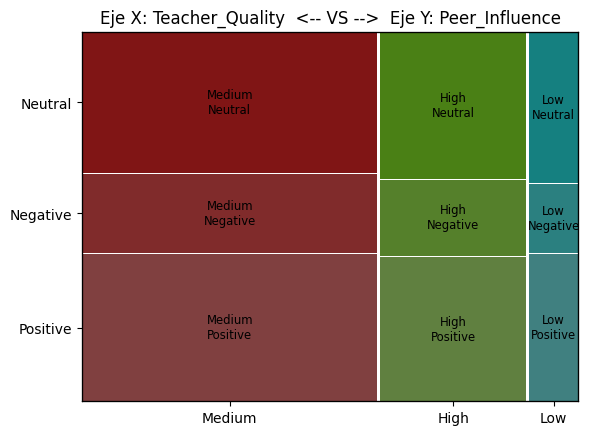

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Medium', 'High School'): (0.0,
   np.float64(0.0),
   0.5950121630198096,
   np.float64(0.4933535383941765)),
  ('Medium', 'College'): (0.0,
   np.float64(0.4966647966723222),
   0.5950121630198096,
   np.float64(0.30581248973783587)),
  ('Medium', 'Postgraduate'): (0.0,
   np.float64(0.8057885446883037),
   0.5950121630198096,
   np.float64(0.19421145531169615)),
  ('High', 'High School'): (0.5999626580693146,
   np.float64(0.0),
   0.2950473535635419,
   np.float64(0.48944536423841056)),
  ('High', 'College'): (0.5999626580693146,
   np.float64(0.4927566225165563),
   0.2950473535635419,
   np.float64(0.3006001655629138)),
  ('High', 'Postgraduate'): (0.5999626580693146,
   np.float64(0.7966680463576158),
   0.2950473535635419,
   np.float64(0.2033319536423841)),
  ('Low', 'High School'): (0.8999605066823615,
   np.float64(0.0),
   0.1000394933176385,
   np.float64(0.48677022614215515)),
  ('Low', 'College'): (0.8999605066823615,
   np.float64(

Text(0.5, 1.0, 'Eje X: Teacher_Quality  <-- VS -->  Eje Y: Parental_Education_Level')

<Figure size 800x600 with 0 Axes>

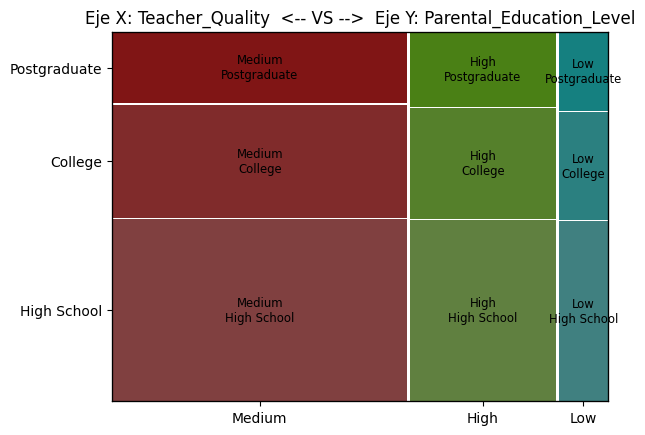

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Medium', 'Near'): (0.0,
   np.float64(0.0),
   0.594151308695226,
   np.float64(0.591314413320836)),
  ('Medium', 'Moderate'): (0.0,
   np.float64(0.5946256715989817),
   0.594151308695226,
   np.float64(0.3009070747734873)),
  ('Medium', 'Far'): (0.0,
   np.float64(0.8988440046506148),
   0.594151308695226,
   np.float64(0.1011559953493851)),
  ('High', 'Near'): (0.599101803744731,
   np.float64(0.0),
   0.29592686991471423,
   np.float64(0.5887252683970219)),
  ('High', 'Moderate'): (0.599101803744731,
   np.float64(0.5920365266751675),
   0.29592686991471423,
   np.float64(0.30644564189050216)),
  ('High', 'Far'): (0.599101803744731,
   np.float64(0.9017934268438155),
   0.29592686991471423,
   np.float64(0.09820657315618445)),
  ('Low', 'Near'): (0.8999791687089501,
   np.float64(0.0),
   0.10002083129104986,
   np.float64(0.6008944961106659)),
  ('Low', 'Moderate'): (0.8999791687089501,
   np.float64(0.6042057543888116),
   0.100020831291049

Text(0.5, 1.0, 'Eje X: Teacher_Quality  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

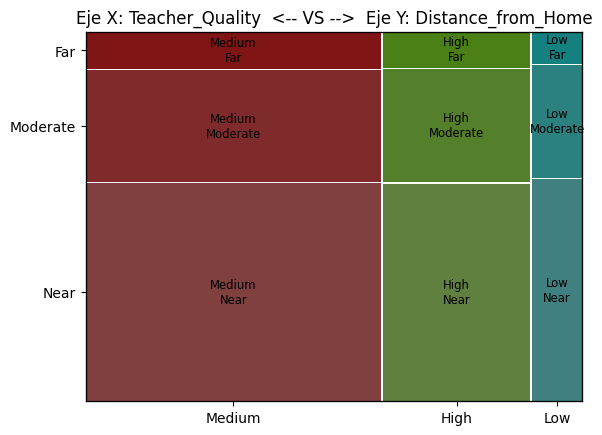

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Positive', 'High School'): (0.0,
   np.float64(0.0),
   0.39591806349577724,
   np.float64(0.48982734697819086)),
  ('Positive', 'College'): (0.0,
   np.float64(0.49313860525633657),
   0.39591806349577724,
   np.float64(0.3003766143337077)),
  ('Positive', 'Postgraduate'): (0.0,
   np.float64(0.7968264778681899),
   0.39591806349577724,
   np.float64(0.20317352213180992)),
  ('Negative', 'High School'): (0.4008685585452822,
   np.float64(0.0),
   0.20677071543275244,
   np.float64(0.47442715961676013)),
  ('Negative', 'College'): (0.4008685585452822,
   np.float64(0.47773841789490584),
   0.20677071543275244,
   np.float64(0.33136912379386013)),
  ('Negative', 'Postgraduate'): (0.4008685585452822,
   np.float64(0.8124187999669117),
   0.20677071543275244,
   np.float64(0.1875812000330882)),
  ('Neutral', 'High School'): (0.6125897690275396,
   np.float64(0.0),
   0.3874102309724604,
   np.float64(0.5017530190884301)),
  ('Neutral', 'College'): (

Text(0.5, 1.0, 'Eje X: Peer_Influence  <-- VS -->  Eje Y: Parental_Education_Level')

<Figure size 800x600 with 0 Axes>

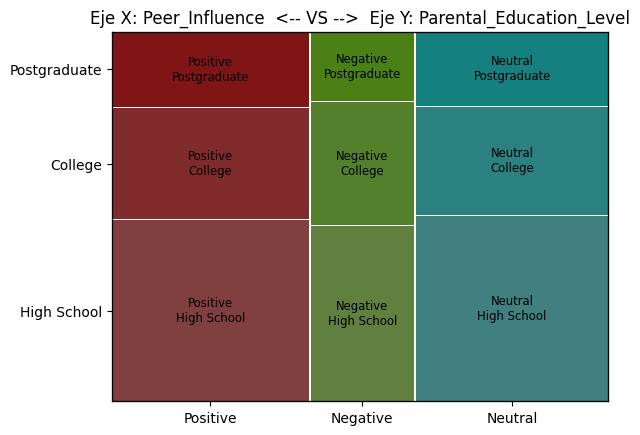

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('Positive', 'Near'): (0.0,
   np.float64(0.0),
   0.3958882126744785,
   np.float64(0.5774125333974902)),
  ('Positive', 'Moderate'): (0.0,
   np.float64(0.5807237916756359),
   0.3958882126744785,
   np.float64(0.3149177567016574)),
  ('Positive', 'Far'): (0.0,
   np.float64(0.8989528066554391),
   0.3958882126744785,
   np.float64(0.10104719334456079)),
  ('Negative', 'Near'): (0.40083870772398345,
   np.float64(0.0),
   0.20589214884791224,
   np.float64(0.5916439423451498)),
  ('Negative', 'Moderate'): (0.40083870772398345,
   np.float64(0.5949552006232955),
   0.20589214884791224,
   np.float64(0.30166536813400857)),
  ('Negative', 'Far'): (0.40083870772398345,
   np.float64(0.8999318270354498),
   0.20589214884791224,
   np.float64(0.10006817296455002)),
  ('Neutral', 'Near'): (0.6116813516214007,
   np.float64(0.0),
   0.38831864837859936,
   np.float64(0.6018357151156035)),
  ('Neutral', 'Moderate'): (0.6116813516214007,
   np.float64(0.60

Text(0.5, 1.0, 'Eje X: Peer_Influence  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

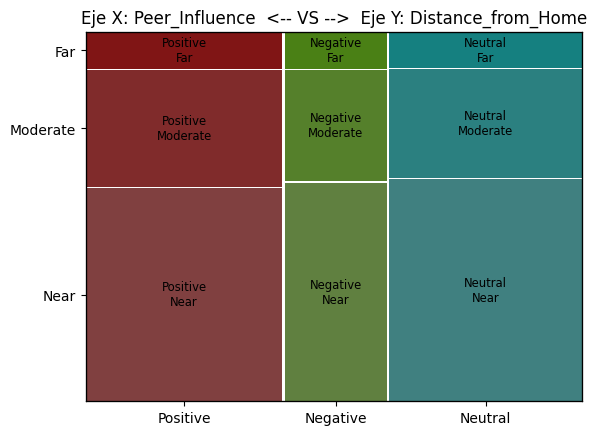

<Figure size 800x600 with 0 Axes>

(<Figure size 640x480 with 3 Axes>,
 {('High School', 'Near'): (0.0,
   np.float64(0.0),
   0.49013738583160643,
   np.float64(0.5963998232889411)),
  ('High School', 'Moderate'): (0.0,
   np.float64(0.5997110815670867),
   0.49013738583160643,
   np.float64(0.2971110230782154)),
  ('High School', 'Far'): (0.0,
   np.float64(0.9001333629234479),
   0.49013738583160643,
   np.float64(0.09986663707655194)),
  ('College', 'Near'): (0.4950878808811114,
   np.float64(0.0),
   0.30148131092178976,
   np.float64(0.5826735544435602)),
  ('College', 'Moderate'): (0.4950878808811114,
   np.float64(0.5859848127217058),
   0.30148131092178976,
   np.float64(0.30954532579814137)),
  ('College', 'Far'): (0.4950878808811114,
   np.float64(0.898841396797993),
   0.30148131092178976,
   np.float64(0.10115860320200692)),
  ('Postgraduate', 'Near'): (0.8015196868524062,
   np.float64(0.0),
   0.19848031314759387,
   np.float64(0.5869608641539004)),
  ('Postgraduate', 'Moderate'): (0.8015196868524062,
   

Text(0.5, 1.0, 'Eje X: Parental_Education_Level  <-- VS -->  Eje Y: Distance_from_Home')

<Figure size 800x600 with 0 Axes>

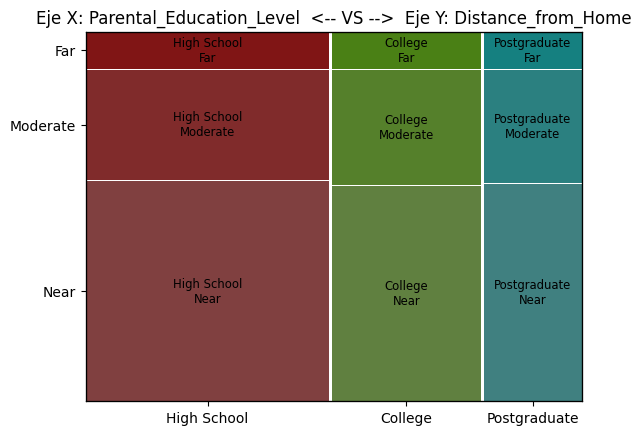

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

for i in range(len(categorical_vars)-1):
    for j in range(i+1, len(categorical_vars)):
        plt.figure(figsize=(8, 6))
        mosaic(df, [categorical_vars[i], categorical_vars[j]])
        plt.title(f'Eje X: {categorical_vars[i]}  <-- VS -->  Eje Y: {categorical_vars[j]}')

        plt.show()

# d. Análisis de la relación entre variables categóricas mediante tablas de contingencia y pruebas de Chi-cuadrado.

In [ ]:
import scipy.stats as stats
import pandas as pd

# Iterar sobre todas las combinaciones de pares de variables categóricas
for i in range(len(categorical_vars) - 1):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # Crear la tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])

        # Aplicar la prueba de Chi-cuadrado
        chi2_stat, p_valor, dof, esperados = stats.chi2_contingency(tabla_contingencia)

        print(f"\nRelación entre {var1} y {var2}:\n")
        print("Tabla de Contingencia:")
        print(tabla_contingencia)
        print(f"\nEstadístico de Chi-cuadrado: {chi2_stat:.2f}")
        print(f"Grados de libertad: {dof}")
        print(f"Valor p: {p_valor:.4f}")

        if p_valor < 0.05:
            print("CONCLUSIÓN: ✅ Existe una relación significativa entre las variables (rechazamos H0).")
        else:
            print("CONCLUSIÓN: ❌ No hay evidencia suficiente para afirmar que las variables están relacionadas (no se rechaza H0).")

        print("\n" + "="*100)


Relación entre Parental_Involvement y Access_to_Resources:

Tabla de Contingencia:
Access_to_Resources   High  Low  Medium
Parental_Involvement                   
High                   568  413     927
Low                    414  231     692
Medium                 993  669    1700

Estadístico de Chi-cuadrado: 9.94
Grados de libertad: 4
Valor p: 0.0414
CONCLUSIÓN: ✅ Existe una relación significativa entre las variables (rechazamos H0).


Relación entre Parental_Involvement y Motivation_Level:

Tabla de Contingencia:
Motivation_Level      High  Low  Medium
Parental_Involvement                   
High                   359  574     975
Low                    278  368     691
Medium                 682  995    1685

Estadístico de Chi-cuadrado: 4.37
Grados de libertad: 4
Valor p: 0.3582
CONCLUSIÓN: ❌ No hay evidencia suficiente para afirmar que las variables están relacionadas (no se rechaza H0).


Relación entre Parental_Involvement y Family_Income:

Tabla de Contingencia:
Family_Incom

# e. Cálculo e interpretación de medidas de asociación como el coeficiente de contingencia y el Cramér's V.

In [ ]:
import scipy.stats as stats
import pandas as pd
import numpy as np

# Iterar sobre todas las combinaciones de variables categóricas
for i in range(len(categorical_vars) - 1):
    for j in range(i + 1, len(categorical_vars)):
        var1 = categorical_vars[i]
        var2 = categorical_vars[j]

        # Tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])

        # Prueba de Chi-cuadrado
        chi2_stat, p_valor, dof, esperados = stats.chi2_contingency(tabla_contingencia)

        # Coeficiente de Contingencia (C)
        n = np.sum(tabla_contingencia.values)  # Total de observaciones
        coef_contingencia = np.sqrt(chi2_stat / (chi2_stat + n))

        # Cálculo de Cramér's V
        k = min(tabla_contingencia.shape) - 1  # Mínimo de filas o columnas - 1
        cramer_v = np.sqrt(chi2_stat / (n * k))

        # Mostrar resultados
        print(f"\nRelación entre {var1} y {var2}:")
        print(f"Coeficiente de Contingencia: {coef_contingencia:.3f}")
        print(f"Cramér's V: {cramer_v:.3f}")

        # Interpretación de Cramér’s V según regla de thumb
        if cramer_v < 0.10:
            interpretacion = "❌ Asociación muy débil"
        elif cramer_v < 0.30:
            interpretacion = "Asociación débil"
        elif cramer_v < 0.50:
            interpretacion = "Asociación moderada"
        else:
            interpretacion = "✅ Asociación fuerte"

        print(f"Interpretación de Cramér's V: {interpretacion}")

        print("\n" + "="*100)



Relación entre Parental_Involvement y Access_to_Resources:
Coeficiente de Contingencia: 0.039
Cramér's V: 0.027
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre Parental_Involvement y Motivation_Level:
Coeficiente de Contingencia: 0.026
Cramér's V: 0.018
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre Parental_Involvement y Family_Income:
Coeficiente de Contingencia: 0.024
Cramér's V: 0.017
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre Parental_Involvement y Teacher_Quality:
Coeficiente de Contingencia: 0.021
Cramér's V: 0.015
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre Parental_Involvement y Peer_Influence:
Coeficiente de Contingencia: 0.028
Cramér's V: 0.020
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación entre Parental_Involvement y Parental_Education_Level:
Coeficiente de Contingencia: 0.023
Cramér's V: 0.016
Interpretación de Cramér's V: ❌ Asociación muy débil


Relación e

# Interpretación del análisis de variables categóricas

1. Prácticamente todas las variables categóricas tienen una frecuencia desigual de concentración entre sus categorías, lo que en primer lugar puede dar la impresión de que tal vez exista alguna correlación entre éstas variables y otras como las cuantitativas o las binarias del apartado 4.

2. A pesar de darme una relación significativa entre Parental_Involvement y Access_to_Resources y entre Motivation_Level y Teacher_Quality en el apartado d., después en el análisis del apartado e. del coeficiente de contingencia y la V de Cramér ha señalado que la relación entre éstas dos es también muy débil, por lo que no podemos tener una relación significativa entre ninguna de las variables categóricas estudiadas aquí.

3. Éstas conclusiones no indican que sean variables que no guarden correlación entre otras variables categóricas que se han excluido por exigencias del enunciado o con las variables cuantitativas. Sería necesario realizar nuevos cálculos y análisis, sobretodo con la variable Exam_Score, ya que ésto sí podría arrojar conclusiones interesantes.

# **4. Análisis descriptivo de variables binarias**

# a. Selección de al menos 3 variables binarias.

In [ ]:
binary_vars = [col for col in df.select_dtypes(include=['object', 'category']).columns if df[col].nunique() == 2] # solo binarias

print("Variables binarias:", binary_vars, "\n")

for col in binary_vars:
    print(f"{col}: {df[col].unique()}")



Variables binarias: ['Extracurricular_Activities', 'Internet_Access', 'School_Type', 'Learning_Disabilities', 'Gender'] 

Extracurricular_Activities: ['No' 'Yes']
Internet_Access: ['Yes' 'No']
School_Type: ['Public' 'Private']
Learning_Disabilities: ['No' 'Yes']
Gender: ['Male' 'Female']


# b. Cálculo de proporciones y frecuencias.

In [ ]:
for col in binary_vars:
    print(f"\nVariable: {col}")

    # Frecuencia absoluta
    frecuencias_abs = df[col].value_counts()
    print("Frecuencias absolutas:")
    print(frecuencias_abs)

    # Frecuencia relativa (proporciones)
    frecuencias_rel = df[col].value_counts(normalize=True)
    print("\nFrecuencias relativas (proporciones):")
    print(frecuencias_rel.round(2))

    print("\n" + "="*50)



Variable: Extracurricular_Activities
Frecuencias absolutas:
Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64

Frecuencias relativas (proporciones):
Extracurricular_Activities
Yes    0.6
No     0.4
Name: proportion, dtype: float64


Variable: Internet_Access
Frecuencias absolutas:
Internet_Access
Yes    6108
No      499
Name: count, dtype: int64

Frecuencias relativas (proporciones):
Internet_Access
Yes    0.92
No     0.08
Name: proportion, dtype: float64


Variable: School_Type
Frecuencias absolutas:
School_Type
Public     4598
Private    2009
Name: count, dtype: int64

Frecuencias relativas (proporciones):
School_Type
Public     0.7
Private    0.3
Name: proportion, dtype: float64


Variable: Learning_Disabilities
Frecuencias absolutas:
Learning_Disabilities
No     5912
Yes     695
Name: count, dtype: int64

Frecuencias relativas (proporciones):
Learning_Disabilities
No     0.89
Yes    0.11
Name: proportion, dtype: float64


Variable: Gender
Frecuencias abs

# c. Visualización de los datos: gráficos de barras.

<Axes: xlabel='Extracurricular_Activities'>

Text(0.5, 1.0, 'Distribución de Extracurricular_Activities')

Text(0.5, 0, 'Extracurricular_Activities')

Text(0, 0.5, 'Frecuencia')

<Axes: xlabel='Internet_Access'>

Text(0.5, 1.0, 'Distribución de Internet_Access')

Text(0.5, 0, 'Internet_Access')

Text(0, 0.5, 'Frecuencia')

<Axes: xlabel='School_Type'>

Text(0.5, 1.0, 'Distribución de School_Type')

Text(0.5, 0, 'School_Type')

Text(0, 0.5, 'Frecuencia')

<Axes: xlabel='Learning_Disabilities'>

Text(0.5, 1.0, 'Distribución de Learning_Disabilities')

Text(0.5, 0, 'Learning_Disabilities')

Text(0, 0.5, 'Frecuencia')

<Axes: xlabel='Gender'>

Text(0.5, 1.0, 'Distribución de Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Frecuencia')

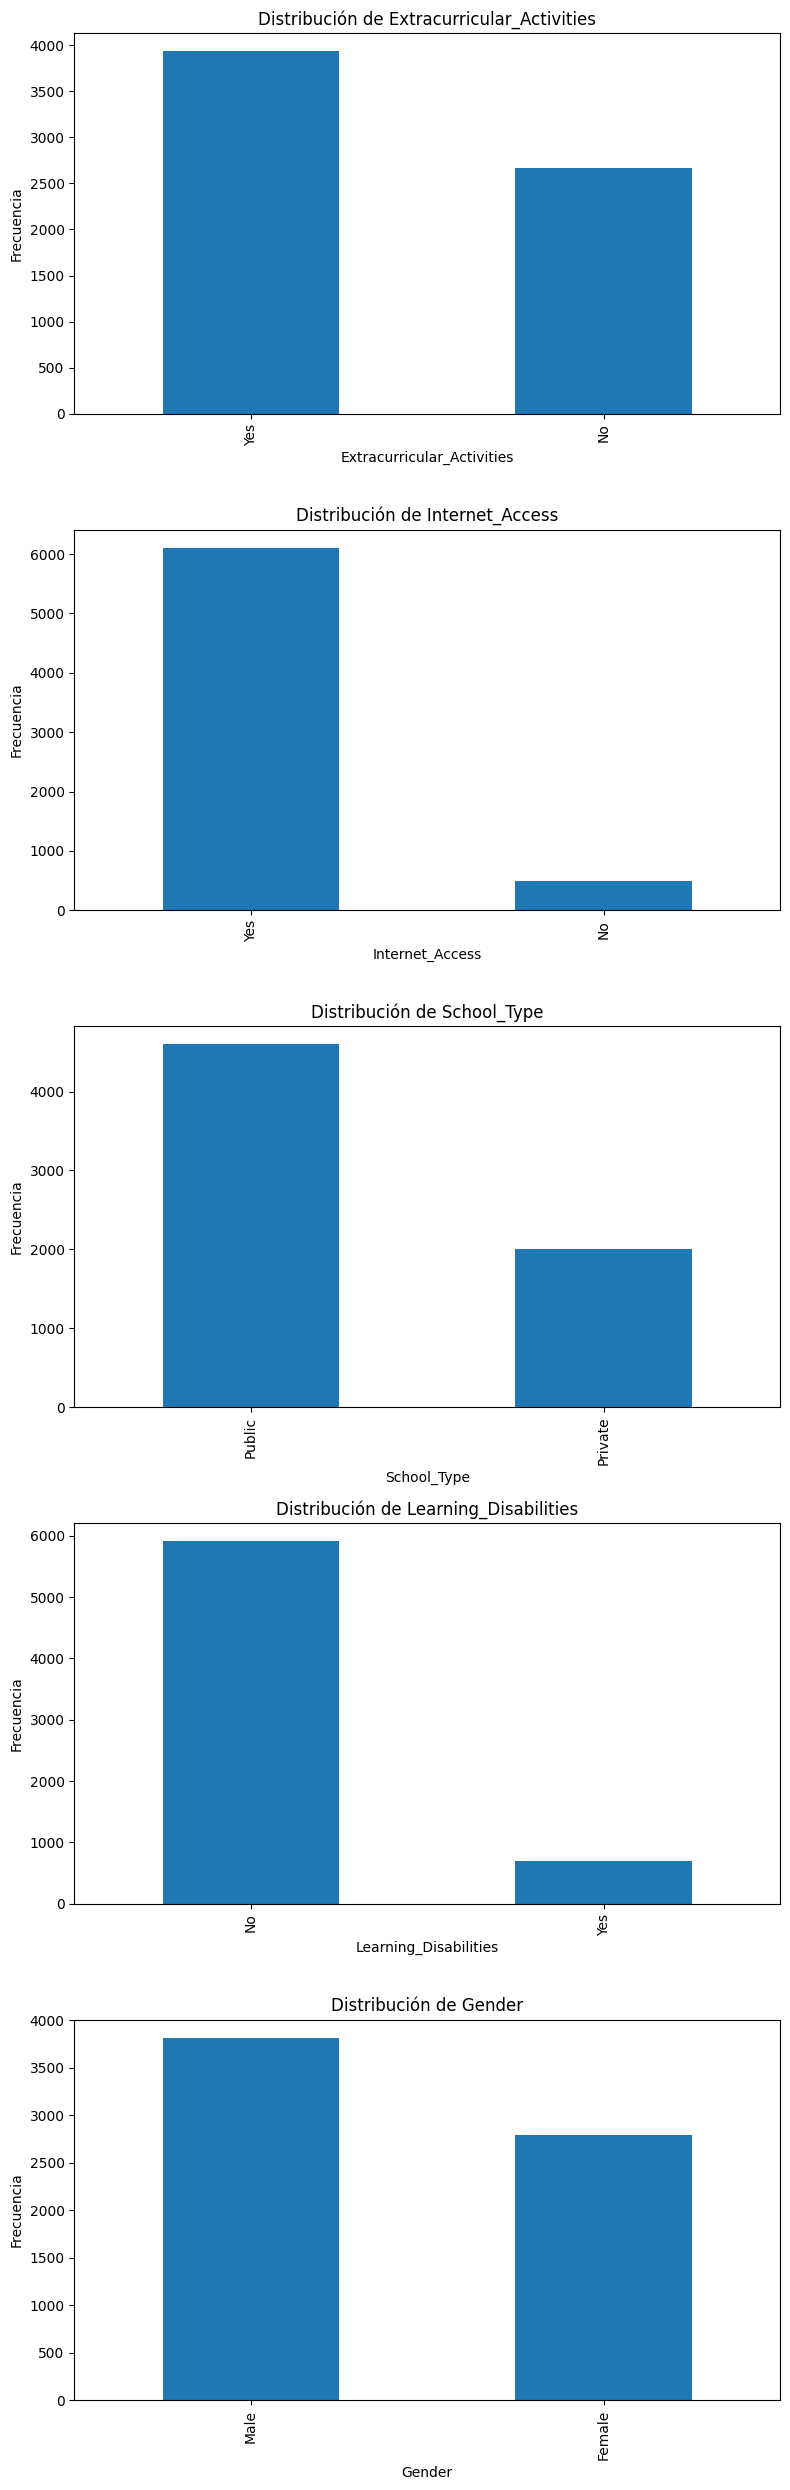

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=len(binary_vars), ncols=1, figsize=(8, 5 * len(binary_vars)))

for i, col in enumerate(binary_vars):
    ax = axes[i] if len(binary_vars) > 1 else axes

    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f'Distribución de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


# d. Análisis de la relación entre variables binarias utilizando tablas de contingencia.

In [ ]:
for i in range(len(binary_vars) - 1):
    for j in range(i + 1, len(binary_vars)):
        var1, var2 = binary_vars[i], binary_vars[j]  # Seleccionar par de variables

        # Crear la tabla de contingencia
        tabla_contingencia = pd.crosstab(df[var1], df[var2])

        # Mostrar resultados
        print(f"\nTabla de Contingencia entre {var1} y {var2}:\n")
        print(tabla_contingencia)
        print("=" * 100)



Tabla de Contingencia entre Extracurricular_Activities y Internet_Access:

Internet_Access              No   Yes
Extracurricular_Activities           
No                          197  2472
Yes                         302  3636

Tabla de Contingencia entre Extracurricular_Activities y School_Type:

School_Type                 Private  Public
Extracurricular_Activities                 
No                              820    1849
Yes                            1189    2749

Tabla de Contingencia entre Extracurricular_Activities y Learning_Disabilities:

Learning_Disabilities         No  Yes
Extracurricular_Activities           
No                          2380  289
Yes                         3532  406

Tabla de Contingencia entre Extracurricular_Activities y Gender:

Gender                      Female  Male
Extracurricular_Activities              
No                            1141  1528
Yes                           1652  2286

Tabla de Contingencia entre Internet_Access y School_Type:

# e. Cálculo del coeficiente de correlación Phi y visualización mediante matrices de correlación Phi.

<Figure size 800x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlación Phi entre Variables Binarias')

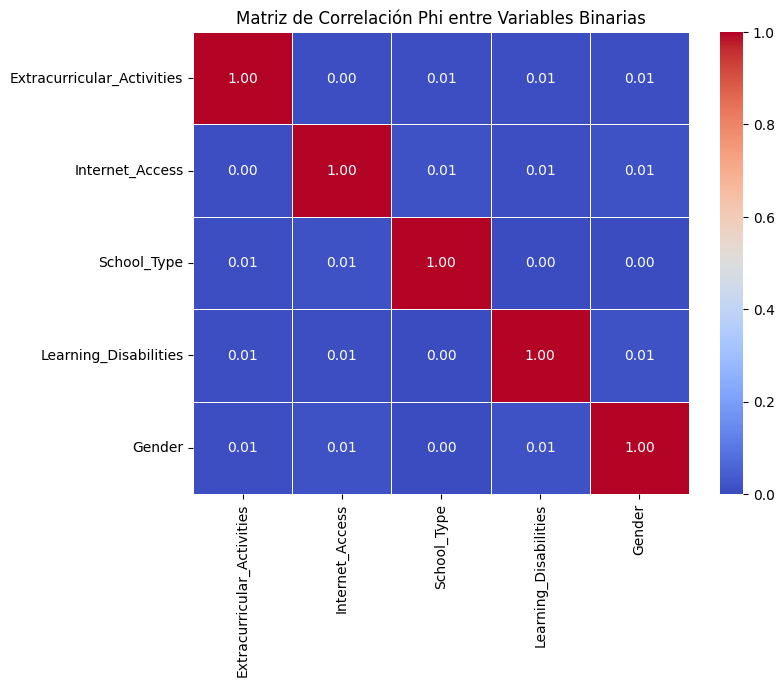

In [ ]:
from scipy.stats import chi2_contingency

# Crear matriz de correlación Phi
phi_corr_matrix = pd.DataFrame(np.zeros((len(binary_vars), len(binary_vars))),
                               index=binary_vars, columns=binary_vars)

# Calcular coeficiente Phi para cada par de variables binarias
for i in range(len(binary_vars)):
    for j in range(i, len(binary_vars)):  # i, j para evitar duplicados
        if i == j:
            phi_corr_matrix.iloc[i, j] = 1.0  # La diagonal siempre es 1
        else:
            var1, var2 = binary_vars[i], binary_vars[j]
            tabla = pd.crosstab(df[var1], df[var2])
            chi2, _, _, _ = chi2_contingency(tabla)  # Test de Chi-cuadrado
            n = df.shape[0]  # Tamaño total de la muestra
            phi = np.sqrt(chi2 / n)  # Cálculo del coeficiente Phi
            phi_corr_matrix.iloc[i, j] = phi
            phi_corr_matrix.iloc[j, i] = phi  # Matriz simétrica

# Visualizar la matriz de correlación Phi
plt.figure(figsize=(8, 6))
sns.heatmap(phi_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación Phi entre Variables Binarias")
plt.show()


# f. Aplicación de la prueba t-Student para comparar grupos definidos por variables binarias y análisis de significancia.

In [ ]:
from scipy import stats

# Selecciona una variable cuantitativa para comparar (puedes cambiar 'Exam_Score' por la que quieras)
variable_cuantitativa = 'Exam_Score'

# Aplicar la prueba t-Student para cada variable binaria y comparar las medias
for var_bin in binary_vars:
    print(f"\nPrueba t-Student para comparar grupos según {var_bin}:")

    # Separar los datos en dos grupos según la variable binaria
    group1 = df[df[var_bin] == df[var_bin].unique()[0]][variable_cuantitativa]  # Primer grupo
    group2 = df[df[var_bin] == df[var_bin].unique()[1]][variable_cuantitativa]  # Segundo grupo

    # Realizar la prueba t
    t_stat, p_value = stats.ttest_ind(group1.dropna(), group2.dropna())  # Realizar la prueba t

    # Mostrar los resultados
    print(f"  Estadístico t: {t_stat:.3f}")
    print(f"  p-valor: {p_value:.3f}")

    # Análisis de significancia
    if p_value < 0.05:
        print(f"✅ La diferencia entre los grupos es estadísticamente significativa (p < 0.05).")
    else:
        print(f"❌ La diferencia entre los grupos no es estadísticamente significativa (p >= 0.05).")

    print("="*100)



Prueba t-Student para comparar grupos según Extracurricular_Activities:
  Estadístico t: -5.243
  p-valor: 0.000
✅ La diferencia entre los grupos es estadísticamente significativa (p < 0.05).

Prueba t-Student para comparar grupos según Internet_Access:
  Estadístico t: 4.189
  p-valor: 0.000
✅ La diferencia entre los grupos es estadísticamente significativa (p < 0.05).

Prueba t-Student para comparar grupos según School_Type:
  Estadístico t: -0.719
  p-valor: 0.472
❌ La diferencia entre los grupos no es estadísticamente significativa (p >= 0.05).

Prueba t-Student para comparar grupos según Learning_Disabilities:
  Estadístico t: 6.939
  p-valor: 0.000
✅ La diferencia entre los grupos es estadísticamente significativa (p < 0.05).

Prueba t-Student para comparar grupos según Gender:
  Estadístico t: -0.165
  p-valor: 0.869
❌ La diferencia entre los grupos no es estadísticamente significativa (p >= 0.05).


# **5. Relaciones entre variables**

# a. Estudio de la correlación entre variables cuantitativas mediante la matriz de correlación y el coeficiente de correlación de Pearson.

Variables cuantitativas:
 Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')


Matriz de correlación (Coeficiente de Pearson):

                   Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
Hours_Studied               1.00       -0.01         0.01             0.02   
Attendance                 -0.01        1.00        -0.02            -0.02   
Sleep_Hours                 0.01       -0.02         1.00            -0.02   
Previous_Scores             0.02       -0.02        -0.02             1.00   
Tutoring_Sessions          -0.01        0.01        -0.01            -0.01   
Physical_Activity           0.00       -0.02        -0.00            -0.01   
Exam_Score                  0.45        0.58        -0.02             0.18   

                   Tutoring_Sessions  Physical_Activity  Exam_Score  
Hours_Studied                  -0.01               0.00        0.45  


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Matriz de Correlación - Pearson')

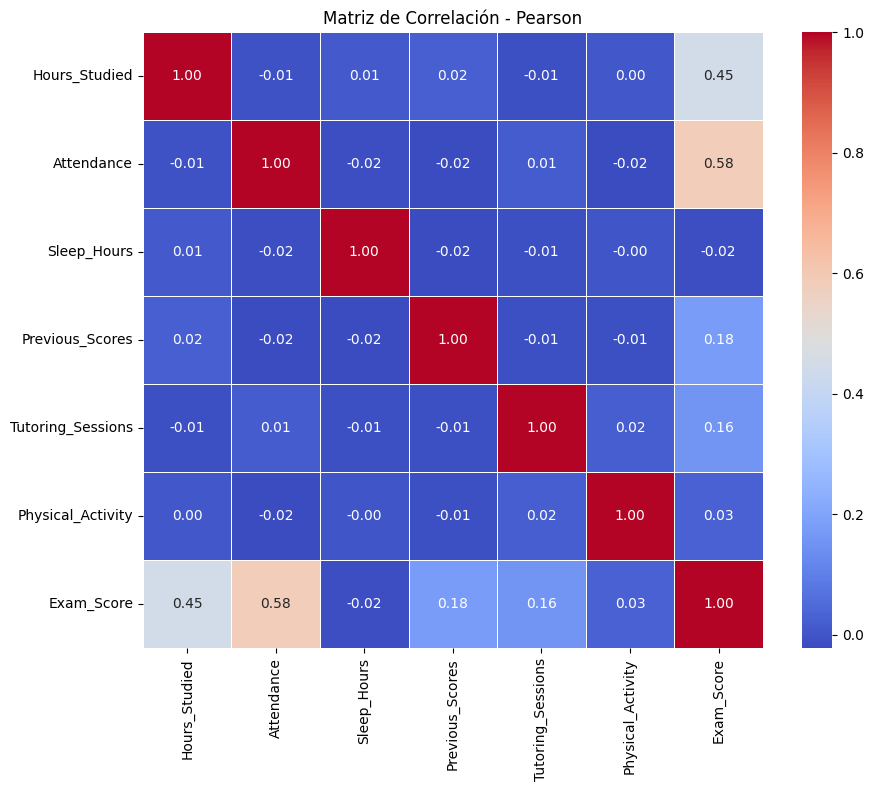

In [ ]:
# Variables cuantitativas ya filtradas en el segundo apartado:
print("Variables cuantitativas:\n", variables_cuantitativas)

# Matriz de correlación:
correlation_matrix = df[variables_cuantitativas].corr(method='pearson')

print("\n\nMatriz de correlación (Coeficiente de Pearson):\n")
print(correlation_matrix.round(2))

# Plot con mapa de calor:
print("\n\nMatriz de correlación (Mapa de Calor):\n")
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlación - Pearson")
plt.show()

# **6. Conclusiones**
# a. Resumen de los hallazgos más importantes.

1. Vistos los nuevos resultados, podemos determinar que Hours_Studied y Attendance tienen la mayor correlación con la nota final del examen, pero la correlación es moderada, y probablemente exista una relación entre éstas dos variables y algunas de las categóricas (incluyendo binarias) que nos acerquen a una correlación más determinista sobre la nota final del examen.

2. Éstas impresiones son algo subjetivas pero veo otras dos relaciones que me parecen interesantes: las de Exam_Score <-> Sleep_Hours y Exam_Score <-> Previous_Scores.
  - En la primera, honestamente sí esperaba una mayor relación con las horas de sueño, y ha terminado siendo incluso negativa (aunque muy cerca de 0).
  - En la segunda, también esperaba mayor relación entre la nota actual y otras notas previas, lo que indica por un lado que el examen sí parece haber sido justo y ajustado a los conocimientos, y también indica que las notas previas sí pueden tener una gran influencia de las variables categóricas, ya que según lo que hemos visto en el apartado 3, los alumnos provienen de contextos muy dispares.

# b. Reflexión sobre la utilidad del análisis descriptivo en la comprensión de los datos.

El análisis descriptivo arroja información muy esclarecedora acerca de las variables y la relación que tienen entre sí. También ayudan a confirmar supuestos estadísticos o hipótesis acerca del uso que se le pretendía dar a los datos para un informe o dentro de un modelo.
A su vez, también puede aportar información que lleve a nuevas ideas o áreas de oportunidad, lo que da las evidencias necesarias para tomar decisiones con cierta seguridad.

# c. Posibles limitaciones del análisis y sugerencias para futuros estudios.

Durante el ejercicio sí he visto ciertas limitaciones en el análisis:

1. En el análisis no se han comparado todas las variables con todas (faltan las cuantitativas con categóricas), lo que nos podría dar una visión limitada de posibles relaciones directas, lo que limita enormemente la capacidad de toma de decisiones.
2. No se ha ahondado más en las relaciones que sí existen entre algunas variables, tal como indiqué en el apartado 2.f.
3. Al no tratarse de distribuciones normales, algunos de los estadísticos calculados no son precisos, y tampoco se ha determinado de qué tipo de distribución se trata.
4. Por último, aunque sí he encontrado correlación entre los datos, ninguna de las correlaciones es lo suficientemente fuerte como para concluir causalidad. Es probable que existan correlaciones entre 3 o más variables que sí se acerquen a una relación causal.
